## L16A Machine Learning for Econometrics: Linear Regression Models

In this notebook we load '../datacig.xlsx', which is country level aggregate data.

Assume that government aims to use tax rate and strict regulations as an anti-smoking policy to decrease cigarette consumption in the country. Using a country-level time series data including cigarette consumption, price, income, tax rates, and dummy variables representing the major tax and regulaiton policy changes, we will analyze the relationships among those variables to uncover the patterns of associations in data. The main goal, as an economist or data analyst, is to find the best prediction and estimation models using the cutting-edge data science techniques.  

In this sense, we will employ exploratory data analysis (EDA) with inferential statistics, principal compnent analysis (PCA), feature engineering, and regression analysis using various estimation and prediction strategies to capture the information from data to use it in policy decisions. We will start asking the following basic data analysis questions: 

Are there variables that are particularly significant in terms of explaining the answer to policy question?

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

What are the most appropriate tests to use to analyze these relationships?

Are there significant differences between subgroups in your data that may be relevant to your research aim?

Again, the aim is to answer those questions using the most appropriate data science and econometric techniques to reach the best prediction and estimation models. 

# Step 1: Importing Modules and Data

In [1]:
import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_excel('datacig.xlsx')

In [3]:
df

Date     lncons   lnprice     lntax    lntipi  D1july09reg  \
0   2005-01-01  22.770554  0.620785 -4.605170  4.441474            0   
1   2005-02-01  22.904891  0.589702 -4.605170  4.298645            0   
2   2005-03-01  22.876975  0.621620 -4.605170  4.417635            0   
3   2005-04-01  22.912580  0.620064 -4.605170  4.351567            0   
4   2005-05-01  22.963752  0.605539 -4.605170  4.418841            0   
..         ...        ...       ...       ...       ...          ...   
117 2014-10-01  22.861446  1.086282 -1.673976  4.889597            1   
118 2014-11-01  22.790900  1.081386 -1.673976  4.886583            1   
119 2014-12-01  23.006065  1.084191 -1.673976  4.852811            1   
120 2015-01-01  22.540911  1.070181 -1.673976  4.695925            1   
121 2015-02-01  22.491954  1.087177 -1.673976  4.670958            1   

     D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  
0             0           0           0                 0  
1             0           0           0                 0  
2             0           0           0                 0  
3             0           0           0                 0  
4             0           0           0                 0  
..          ...         ...         ...               ...  
117           1           1           1                 1  
118           1           1           1                 1  
119           1           1           1                 1  
120           1           1           1                 1  
121           1           1           1                 1  

[122 rows x 10 columns]

In [4]:
df.columns

Index(['Date', 'lncons', 'lnprice', 'lntax', 'lntipi', 'D1july09reg',
       'D2jan10tax', 'D3oct11tax', 'D4jul12reg', 'D5jan13mixstrtgy'],
      dtype='object')

# Step 2: Inferential Analysis

# Q1: Are there variables that are particularly significant in terms of explaining the answer to your question?

In [5]:
#from matplotlib import rcParams
#sns.set_style("whitegrid")
#sns.set_context("poster")

In [6]:
#Always make sure if there are missing values
df.isna().sum()

Date                0
lncons              0
lnprice             0
lntax               0
lntipi              0
D1july09reg         0
D2jan10tax          0
D3oct11tax          0
D4jul12reg          0
D5jan13mixstrtgy    0
dtype: int64

In [7]:
df.describe()

lncons     lnprice       lntax      lntipi  D1july09reg  \
count  122.000000  122.000000  122.000000  122.000000   122.000000   
mean    22.835848    0.936851   -2.410671    4.619720     0.557377   
std      0.148654    0.170514    0.664727    0.126495     0.498745   
min     22.428656    0.589702   -4.605170    4.298645     0.000000   
25%     22.761239    0.786303   -2.659260    4.529907     0.000000   
50%     22.857615    1.009797   -2.277892    4.620054     1.000000   
75%     22.940217    1.087124   -1.931022    4.714920     1.000000   
max     23.158421    1.194820   -1.673976    4.889597     1.000000   

       D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  
count  122.000000  122.000000  122.000000        122.000000  
mean     0.508197    0.336066    0.262295          0.213115  
std      0.501994    0.474310    0.441696          0.411197  
min      0.000000    0.000000    0.000000          0.000000  
25%      0.000000    0.000000    0.000000          0.000000  
50%      1.000000    0.000000    0.000000          0.000000  
75%      1.000000    1.000000    1.000000          0.000000  
max      1.000000    1.000000    1.000000          1.000000

In [8]:
# Times series components of data

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Find the minimum and maximum dates
start_date = df['Date'].min()
end_date = df['Date'].max()

# Print the data range
print("Data range: {} to {}".format(start_date, end_date))


Data range: 2005-01-01 00:00:00 to 2015-02-01 00:00:00


Data range: 2005-01-01 00:00:00 to 2015-02-01 00:00:00


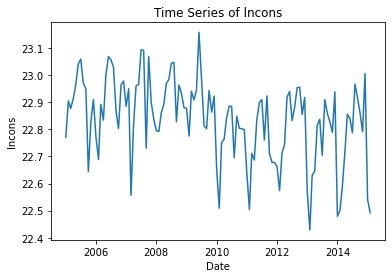

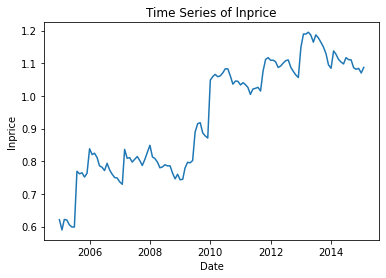

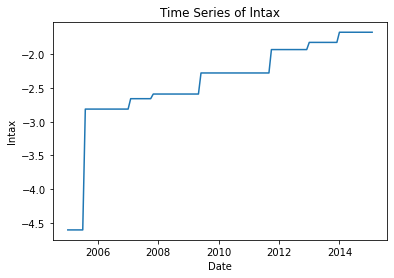

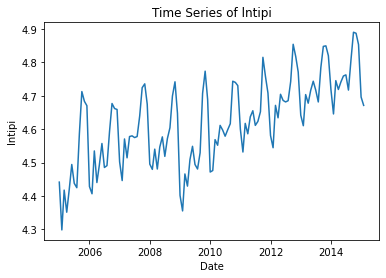

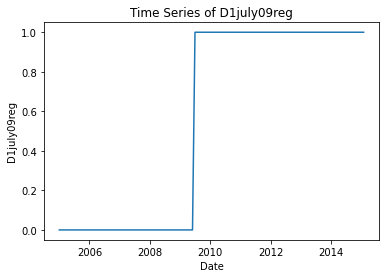

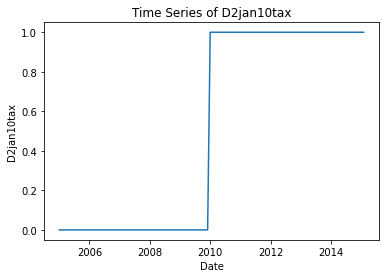

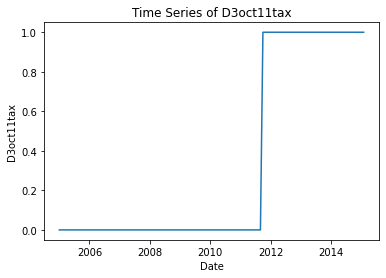

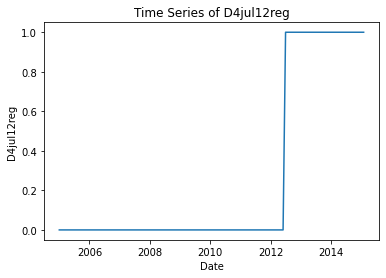

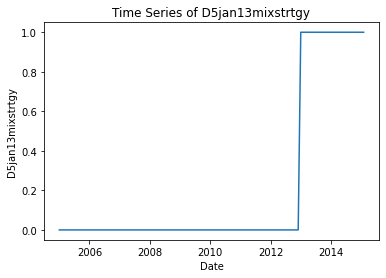

In [9]:
# Visualizing time series charts for each variable
# Print the data range
print("Data range: {} to {}".format(start_date, end_date))

# Plot time series for each variable
for column in df.columns:
    if column != 'Date':
        plt.figure()
        plt.plot(df['Date'], df[column])
        plt.title("Time Series of {}".format(column))
        plt.xlabel("Date")
        plt.ylabel(column)
        plt.show()


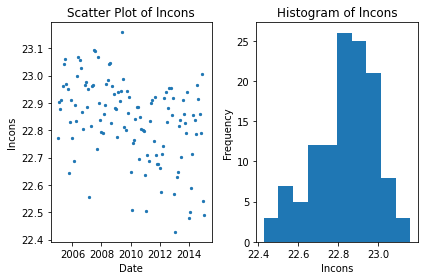

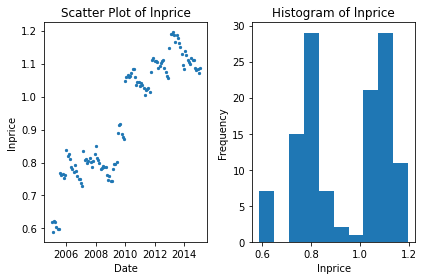

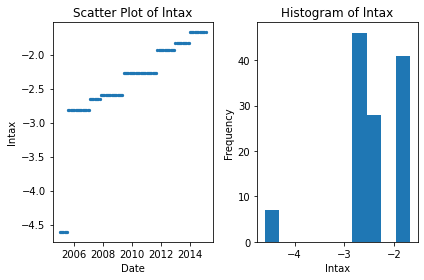

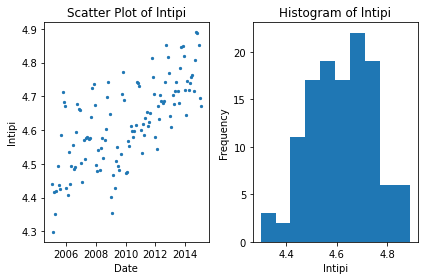

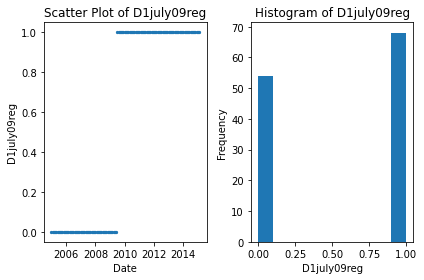

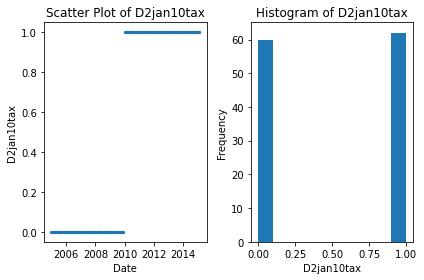

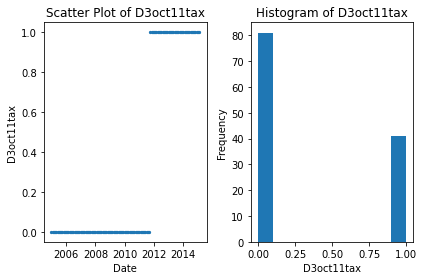

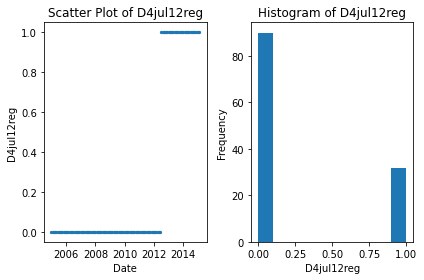

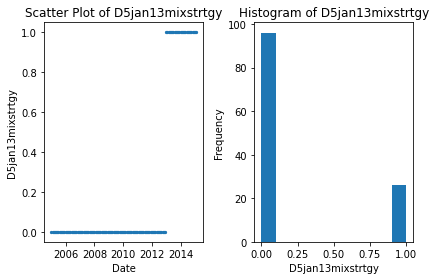

In [10]:
# Visualizing the time series variables using scatter plots and bars
# Plot scatter plots and histograms for each variable
for column in df.columns:
    if column != 'Date':
        plt.figure()

        # Scatter plot
        plt.subplot(1, 2, 1)
        plt.scatter(df['Date'], df[column], s=5)
        plt.title("Scatter Plot of {}".format(column))
        plt.xlabel("Date")
        plt.ylabel(column)

        # Histogram
        plt.subplot(1, 2, 2)
        plt.hist(df[column], bins=10)
        plt.title("Histogram of {}".format(column))
        plt.xlabel(column)
        plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()


# Visualization for comparison

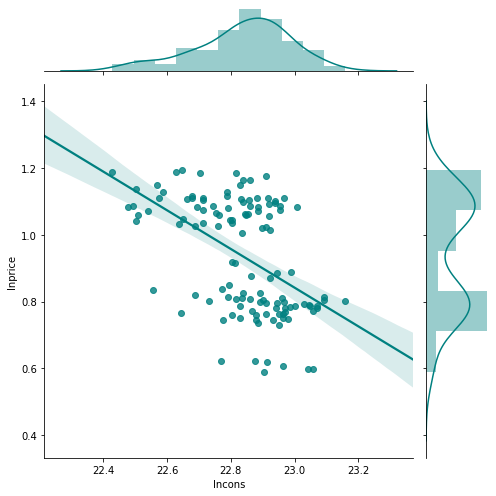

In [11]:
# We can visualize the relationship between price and demand for cigarettes
sns.jointplot(x="lncons", y="lnprice", data=df, kind='reg', color='teal', height=7);

In this, prices and cigarette consumption are the most important variables since it is expected that tax increase as an antitobacco measure will increase prices for cigarettes and the increase in cigarette prices will lead to a decline in consumption or demand for cigarettes. Accordingly, the plot depicted above suggests that there is a negative relationhsip between price and consumption or demand cigarettes as expected.

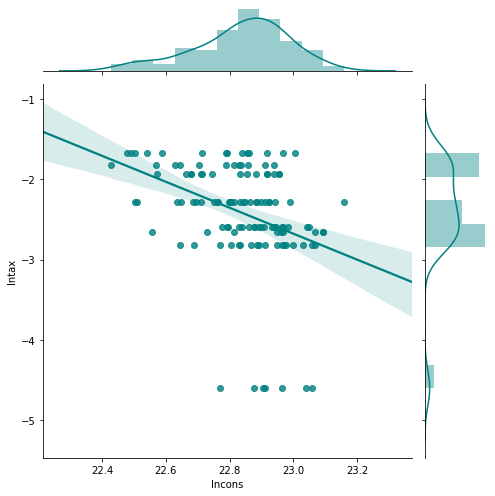

In [12]:
# We can visualize the relationship between tax rates and demand for cigarettes
sns.jointplot(x="lncons", y="lntax", data=df, kind='reg', color='teal', height=7)

The plot above depicts the relationship between tax rates and demand for cigarettes. It suggests that there is a negative relationship between tax rates and consumption.

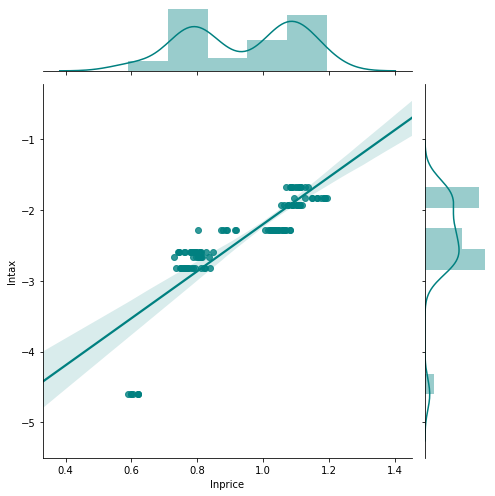

In [13]:
# Similarly, we can visualize the relationship between tax rates and cigarette pricess
sns.jointplot(x="lnprice", y="lntax", data=df, kind='reg', color='teal', height=7)

As shown in the plot above, there is a strong positive relationship between tax rates and prices as expected.

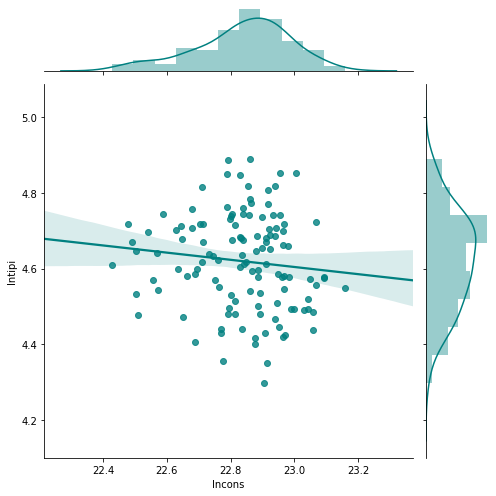

In [14]:
# Similarly, we can visualize the relationship between lncons and lntipi
sns.jointplot(x="lncons", y="lntipi", data=df, kind='reg', color='teal', height=7)

# Reponse to Q1
Yes. lncons, lnprice, lntax, and dummy variables are particularly important to uncover the patterns of associations in data to answer the policy research question.  

# Q2: Are there strong correlations between pairs of independent variables?
We have lncons as dependent variable and lnprice, lntipi, lntax, and dummy variables as independent variables.
So, we can analyze the correlation relationship between them. Recall that we should use continous variables to calculate the correlation coefficients. 

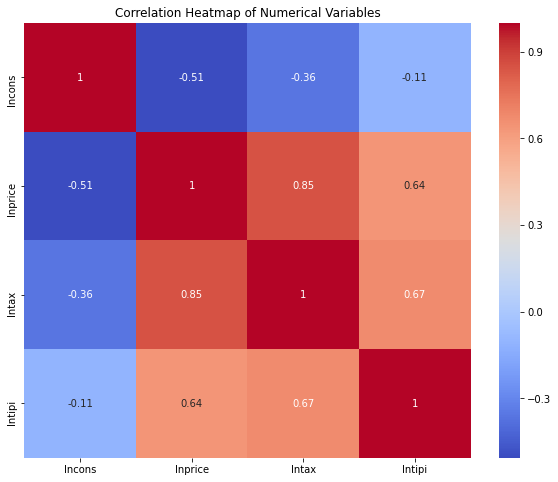

In [15]:
# Define the numerical variables
numerical_vars = ['lncons', 'lnprice', 'lntax', 'lntipi']

# Subset the DataFrame with numerical variables
df_numerical = df[numerical_vars]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


In [16]:
from scipy.stats.stats import pearsonr
corr, _ = pearsonr(df.lncons, df.lnprice)
print(corr)
corr, _ = pearsonr(df.lncons, df.lntax)
print(corr)
corr, _ = pearsonr(df.lncons, df.lntipi)
print(corr)
corr, _ = pearsonr(df.lnprice, df.lntax)
print(corr)
corr, _ = pearsonr(df.lnprice, df.lntipi)
print(corr)
corr, _ = pearsonr(df.lntax, df.lntipi)
print(corr)

-0.5058108830435305
-0.3622712404072257
-0.11143397415155362
0.8526116174578235
0.6356145783590718
0.6737044027215473


# Interpretation of correlation results
As expected, there is a negative correlation between lncons and lnprice as well as lncons and lntax. 

Also, surprisingly, there is a nergative correlation between lncons and lntipi. 

However, whereas correlation between lncons and lntax and lntipi is weak (-0.36), there is a stronger correlation between lncons and lnprice (-0.50). 

More importantly, the highest correlation coeeficient occurs between lntax and lnprice as independent variables, which is important for regression analysis because this result suggests that there is collinearity problem between those two independent variables. We should make sure the importance of those features on machine learning prediction results as well as econometric estimation models. 

# Q3: What are the most appropriate tests to use to analyze these relationships?
The results from comparisons and associations among the variables in the above EDA suggest that we can use the varaibles lnprice, lntax, lntipi, and dummy variables as x covariates or predictors and lncons as their corresponding target/response/dependent variable (y) values to analyze the relationships between them. This results refers to linear regression analysis. 

Accordingly, in order to analyze those relationships, using regression models based on continuous target variable, we will use appropriate econometric estimation and machine learning prediction methods. Using different specification strategies, we will try to find the best estimation and prediction models in both econometric and machine learning analyses. In this sense, we will test (non)-linearity, functional forms (parametric and non-parametric functions), regularization, and feature importance to see if there is improvement in the estimation/prediction results and thus, we will be able to find the best model. For that reason, we will employ many different models under different estimation and/or prediction strategies below.  

In [17]:
#leverage the Python stats package for ease
stats.ttest_ind(df['lncons'], df['lnprice'])

Ttest_indResult(statistic=1069.2603064471257, pvalue=0.0)

In [18]:
m_new = ols('lncons ~ lnprice',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     41.26
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.80e-09
Time:                        14:35:32   Log-Likelihood:                 77.966
No. Observations:                 122   AIC:                            -151.9
Df Residuals:                     120   BIC:                            -146.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2490      0.065    355.678      0.0

In [19]:
# Fit the regression model
m_new = sm.OLS.from_formula('lncons ~ lnprice', data=df).fit()

# Compute robust standard errors using HC1 estimator
robust_cov = m_new.get_robustcov_results(cov_type='HC1')

# Print the summary table with robust standard errors
print(robust_cov.summary())


                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     43.21
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.34e-09
Time:                        14:35:32   Log-Likelihood:                 77.966
No. Observations:                 122   AIC:                            -151.9
Df Residuals:                     120   BIC:                            -146.3
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2490      0.061    380.282      0.0

# The first OLS model above suggests that demand elasticity is -.44 and this result is statistically significant (p(t)=0.000). However, R^2 is low (.25).  

In [20]:
m = ols('lncons ~ lntax',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     18.13
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           4.12e-05
Time:                        14:35:32   Log-Likelihood:                 68.522
No. Observations:                 122   AIC:                            -133.0
Df Residuals:                     120   BIC:                            -127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6405      0.048    475.960      0.0

# The second OLS model between lncons and lntax suggests that tax elasticity is -.08, which is very low, and this result is statistically significant (p(t)=0.000). However, R^2 is still low (.13).  


In [21]:
m_new = ols('lncons ~ lnprice+lntax',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     22.37
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           5.64e-09
Time:                        14:35:32   Log-Likelihood:                 79.412
No. Observations:                 122   AIC:                            -152.8
Df Residuals:                     119   BIC:                            -144.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5611      0.196    120.320      0.0

# In the third OLS model as above, I regress lncons on lnprice and lntax, which are highly correlated, and the sign of tax elasticity is positive now. This result suggests that this model is not valid because of the collinearity between tax and price in the same model. For that reason, we have to use price and tax variables differently in the regression models. Otherwise, the models will not be valid. 


In [22]:
df

Date     lncons   lnprice     lntax    lntipi  D1july09reg  \
0   2005-01-01  22.770554  0.620785 -4.605170  4.441474            0   
1   2005-02-01  22.904891  0.589702 -4.605170  4.298645            0   
2   2005-03-01  22.876975  0.621620 -4.605170  4.417635            0   
3   2005-04-01  22.912580  0.620064 -4.605170  4.351567            0   
4   2005-05-01  22.963752  0.605539 -4.605170  4.418841            0   
..         ...        ...       ...       ...       ...          ...   
117 2014-10-01  22.861446  1.086282 -1.673976  4.889597            1   
118 2014-11-01  22.790900  1.081386 -1.673976  4.886583            1   
119 2014-12-01  23.006065  1.084191 -1.673976  4.852811            1   
120 2015-01-01  22.540911  1.070181 -1.673976  4.695925            1   
121 2015-02-01  22.491954  1.087177 -1.673976  4.670958            1   

     D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  
0             0           0           0                 0  
1             0           0           0                 0  
2             0           0           0                 0  
3             0           0           0                 0  
4             0           0           0                 0  
..          ...         ...         ...               ...  
117           1           1           1                 1  
118           1           1           1                 1  
119           1           1           1                 1  
120           1           1           1                 1  
121           1           1           1                 1  

[122 rows x 10 columns]

In [23]:
m_new = ols('lncons ~ lnprice+lntipi',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     29.29
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           4.53e-11
Time:                        14:35:32   Log-Likelihood:                 84.359
No. Observations:                 122   AIC:                            -162.7
Df Residuals:                     119   BIC:                            -154.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.5184      0.481     44.709      0.0

In [24]:
m_new = ols('lncons ~ lntax+lntipi',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.63
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.44e-05
Time:                        14:35:32   Log-Likelihood:                 70.827
No. Observations:                 122   AIC:                            -135.7
Df Residuals:                     119   BIC:                            -127.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.2339      0.659     32.230      0.0

In [25]:
m_new = ols('lncons ~ lnprice+lntipi+D1july09reg+D2jan10tax+D3oct11tax+D4jul12reg+D5jan13mixstrtgy',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     9.300
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           4.49e-09
Time:                        14:35:32   Log-Likelihood:                 87.498
No. Observations:                 122   AIC:                            -159.0
Df Residuals:                     114   BIC:                            -136.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.4431      0.558  

In [26]:
m_new = ols('lncons ~ lntax+lntipi+D1july09reg+D2jan10tax+D3oct11tax+D4jul12reg+D5jan13mixstrtgy',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     8.862
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.12e-08
Time:                        14:35:32   Log-Likelihood:                 86.443
No. Observations:                 122   AIC:                            -156.9
Df Residuals:                     114   BIC:                            -134.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           20.8105      0.629  

In [27]:
m_new = ols('lncons ~ lnprice+lntipi+D1july09reg+D5jan13mixstrtgy',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     15.12
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           5.45e-10
Time:                        14:35:32   Log-Likelihood:                 85.353
No. Observations:                 122   AIC:                            -160.7
Df Residuals:                     117   BIC:                            -146.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.2912      0.523  

In [28]:
m_new = ols('lncons ~ lnprice+lntipi+D2jan10tax+D3oct11tax',df).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 lncons   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     14.55
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.13e-09
Time:                        14:35:32   Log-Likelihood:                 84.570
No. Observations:                 122   AIC:                            -159.1
Df Residuals:                     117   BIC:                            -145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.3733      0.541     39.481      0.0

# Interpretation of regression analysis
Under the first scenario, we estimate the relationships between price, income and consumption with and without dummies. Then, we drop price variable from the first-scenario models and estimate relationships between tax, income, consumption and regulation dummies under Scenario 2. Lastly, we observe the relationships between income, dummies, and consumption under Scenario 3. Using those different scenarios and models, we aim to reveal the relationship between tax and regulation policies on consumption in the most robust way. we find that the long-term average price and income elasticities of demand for cigarettes are is -0.561 and 0.38, respectively. The long run tax elasticity of demand is centered on -0.11. Regarding dummies, we find that excise taxes and regulations have economically and statistically significant impact in reducing cigarette consumption. The findings confirm that government has reduced cigarette consumption through taxation and regulation.

On the other hand, small R2 values from all the models, even though there were small improvements in different models with better estimation strategies, sugges that we should use larger data and/or more variables. So, after prediction models, we will get back to econometric estimation models to use all that information from machine learning models in econometric models to see if there will be improvement in estimation results. So, basically, we will use the above specifications as baseline models for the following prediction and estimation models. 

# Prediction

Using the information from both EDA and estimation results above, we will make predictions;

to better understand the relationships between y adn x covariates, 

to find the best prediciton model, and  

to improve the estimation and prediction results in both machine learning and econometric models.  

To this aim, we will do more feature engineering and mostly focus on model selection using data science and machine learning techniques. 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              122 non-null    datetime64[ns]
 1   lncons            122 non-null    float64       
 2   lnprice           122 non-null    float64       
 3   lntax             122 non-null    float64       
 4   lntipi            122 non-null    float64       
 5   D1july09reg       122 non-null    int64         
 6   D2jan10tax        122 non-null    int64         
 7   D3oct11tax        122 non-null    int64         
 8   D4jul12reg        122 non-null    int64         
 9   D5jan13mixstrtgy  122 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 9.7 KB


Note that in machine learning models, it is generally recommended to convert the data types to a consistent format, typically numerical, to ensure compatibility and optimal performance. This is because converting the data types to float for machine learning models; 

helps ensure compatibility, 

allows for numerical representation and processing, 

facilitates feature scaling, 

supports missing value handling, 

and improves computational efficiency. 

However, keep in mind that the specific data type conversions required may depend on the nature of the variables and the requirements of the machine learning algorithms being used. It's important to note that not all features or variables may need to be converted to float. For example, if you have categorical variables, you may need to convert them to numerical representations using techniques like one-hot encoding or ordinal encoding, as we did earlier using qualitative variables. 

In [30]:
df['D1july09reg'] = df['D1july09reg'].astype(float)
df['D2jan10tax'] = df['D2jan10tax'].astype(float)
df['D3oct11tax'] = df['D3oct11tax'].astype(float)
df['D4jul12reg'] = df['D4jul12reg'].astype(float)
df['D5jan13mixstrtgy'] = df['D5jan13mixstrtgy'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              122 non-null    datetime64[ns]
 1   lncons            122 non-null    float64       
 2   lnprice           122 non-null    float64       
 3   lntax             122 non-null    float64       
 4   lntipi            122 non-null    float64       
 5   D1july09reg       122 non-null    float64       
 6   D2jan10tax        122 non-null    float64       
 7   D3oct11tax        122 non-null    float64       
 8   D4jul12reg        122 non-null    float64       
 9   D5jan13mixstrtgy  122 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 9.7 KB


In [31]:
df

Date     lncons   lnprice     lntax    lntipi  D1july09reg  \
0   2005-01-01  22.770554  0.620785 -4.605170  4.441474          0.0   
1   2005-02-01  22.904891  0.589702 -4.605170  4.298645          0.0   
2   2005-03-01  22.876975  0.621620 -4.605170  4.417635          0.0   
3   2005-04-01  22.912580  0.620064 -4.605170  4.351567          0.0   
4   2005-05-01  22.963752  0.605539 -4.605170  4.418841          0.0   
..         ...        ...       ...       ...       ...          ...   
117 2014-10-01  22.861446  1.086282 -1.673976  4.889597          1.0   
118 2014-11-01  22.790900  1.081386 -1.673976  4.886583          1.0   
119 2014-12-01  23.006065  1.084191 -1.673976  4.852811          1.0   
120 2015-01-01  22.540911  1.070181 -1.673976  4.695925          1.0   
121 2015-02-01  22.491954  1.087177 -1.673976  4.670958          1.0   

     D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  
0           0.0         0.0         0.0               0.0  
1           0.0         0.0         0.0               0.0  
2           0.0         0.0         0.0               0.0  
3           0.0         0.0         0.0               0.0  
4           0.0         0.0         0.0               0.0  
..          ...         ...         ...               ...  
117         1.0         1.0         1.0               1.0  
118         1.0         1.0         1.0               1.0  
119         1.0         1.0         1.0               1.0  
120         1.0         1.0         1.0               1.0  
121         1.0         1.0         1.0               1.0  

[122 rows x 10 columns]

In [32]:
#PREDICTION MODEL 1: In this model, we will use all the features to get the initial results.
# load the data
data = df

# split the data into features and target variable
X = data.drop(['Date', 'lncons'], axis=1)
y = data['lncons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: -0.080, MSE: 0.024
Lasso Regression R-squared: -0.084, MSE: 0.024
Ridge Regression R-squared: -0.083, MSE: 0.024
ElasticNet R-squared: -0.084, MSE: 0.024
Decision Trees Regression R-squared: -0.183, MSE: 0.027
Random Forest Regression R-squared: 0.043, MSE: 0.022
XGBoost Regression R-squared: -0.024, MSE: 0.023
SVM Regression R-squared: -0.014, MSE: 0.023


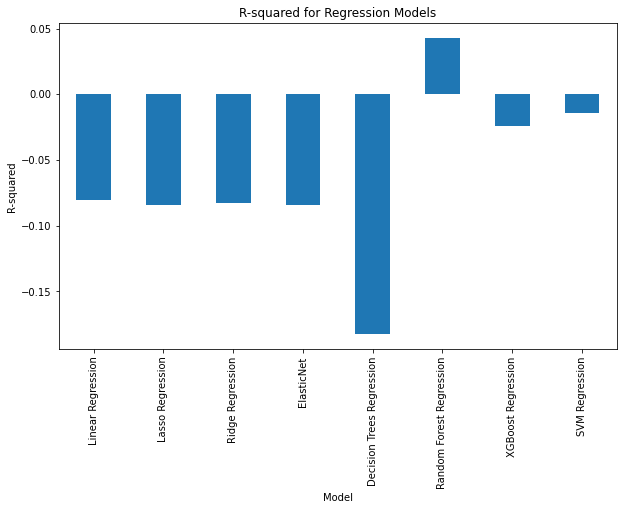

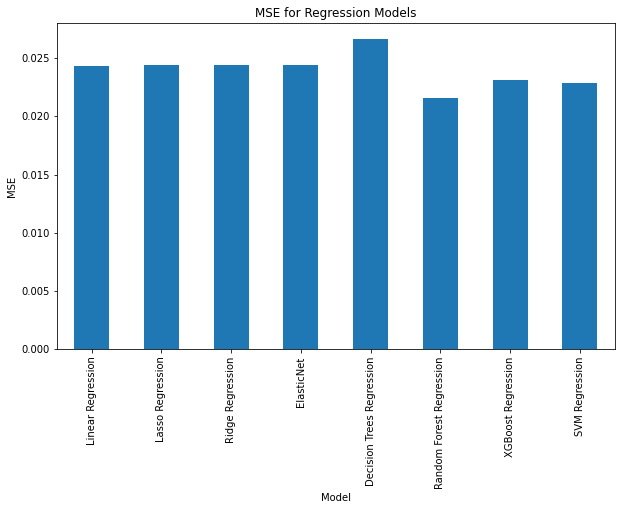

In [33]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


# Results

Based on the provided results, it seems that the performance of the regression models is not satisfactory, as indicated by the negative R-squared values and relatively high mean squared error (MSE) values.

A negative R-squared value suggests that the models are not capturing the patterns and/or relationships in  data well, resulting in poor predictive accuracy.

Note that the MSE values refer to the average squared difference between the predicted values and the actual values. 

***The higher the MSE, the greater the average difference between the predictions and the true values, further indicating poor model performance.

It is possible to infer that the results suggest that the chosen models (Linear Regression, Lasso Regression, Ridge Regression, ElasticNet, Decision Trees, Random Forest, XGBoost, and SVM Regression) are not able to effectively capture the relationships between x covariates and the target variable.

To improve the performance of the same models, it is helpful to consider the following steps:

Collect more data: Try to collect more data to improve the predictive powers of the models used because this will help the algorithms learn and generalize the patterns of associations in data, if possible.

Make Sure about the Quality of Data: Do EDA more carefully for missing values, outliers, or inconsistencies in data that could affect the model's performance.

Better Feature Engineering: Reassess the relevance and quality of all the features used in the models. You should select more meaningful features or transform the existing ones to improve the model's ability to capture the underlying relationships.

Hyperparameter Tuning: Experiment with different hyperparameter settings for the models to find the optimal combination that provides better performance.

Model Selection: Consider trying different types of models or ensemble methods that may be better suited for capturing the patterns in the data.

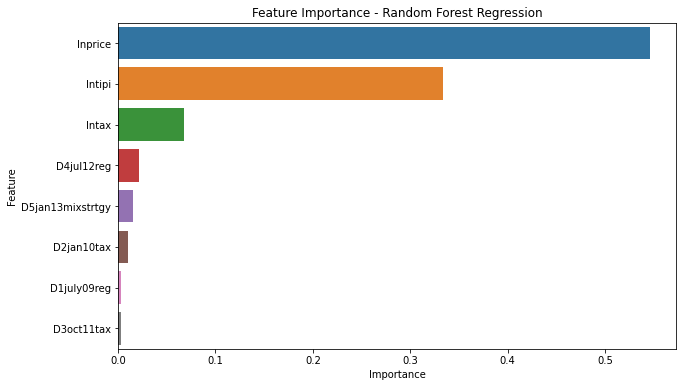

In [34]:
#Feature importance for random forest because random forest is the best model for the first prediction.
# Calculate feature importance for RandomForestRegressor
rf_feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [35]:
#PREDICTION MODEL 2: In this model, we will drop tax to see if there is improvement in the results because tax is highly correlated with price.
# load the data
data = df

# split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax'], axis=1)
y = data['lncons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: -0.017, MSE: 0.023
Lasso Regression R-squared: -0.084, MSE: 0.024
Ridge Regression R-squared: -0.022, MSE: 0.023
ElasticNet R-squared: -0.084, MSE: 0.024
Decision Trees Regression R-squared: -0.188, MSE: 0.027
Random Forest Regression R-squared: 0.063, MSE: 0.021
XGBoost Regression R-squared: -0.194, MSE: 0.027
SVM Regression R-squared: 0.015, MSE: 0.022


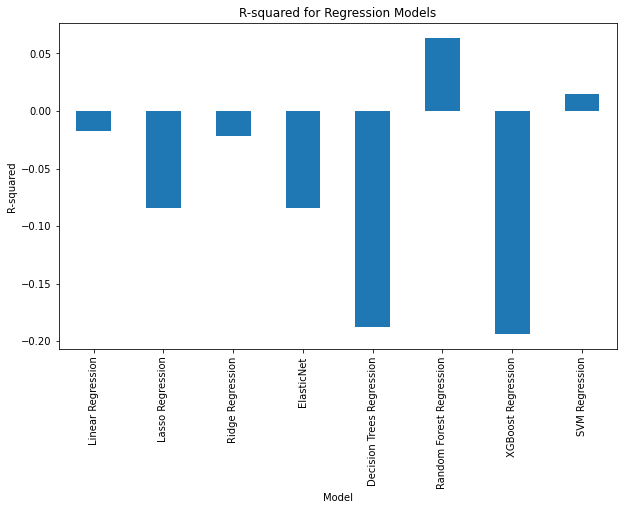

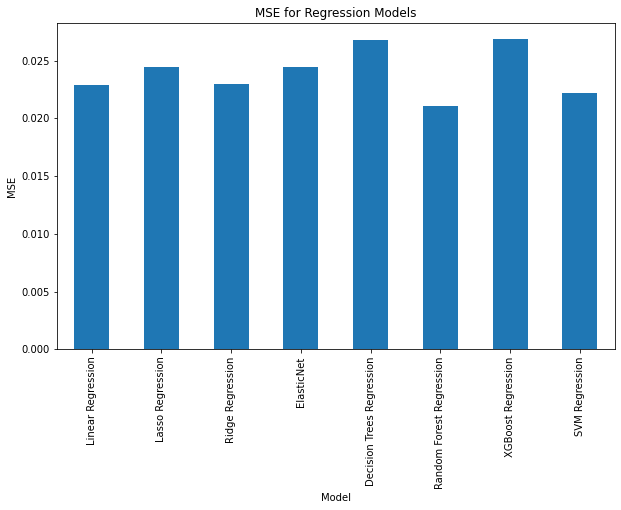

In [36]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


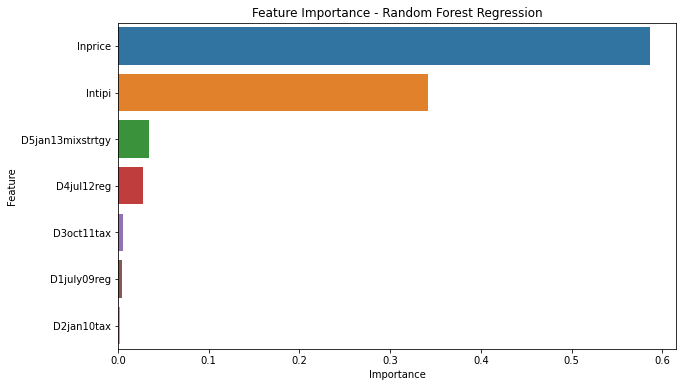

In [37]:
#Feature importance for random forest because random forest is the best model for the second prediction.
# Calculate feature importance for RandomForestRegressor
rf_feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [38]:
# PREDICTION MODEL 3: In this model, we will keep only the variables with high feature importance using the information from the last models. 

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df

# split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.008, MSE: 0.022
Lasso Regression R-squared: -0.084, MSE: 0.024
Ridge Regression R-squared: 0.023, MSE: 0.022
ElasticNet R-squared: -0.084, MSE: 0.024
Decision Trees Regression R-squared: 0.057, MSE: 0.021
Random Forest Regression R-squared: 0.050, MSE: 0.021
XGBoost Regression R-squared: -0.194, MSE: 0.027
SVM Regression R-squared: 0.042, MSE: 0.022


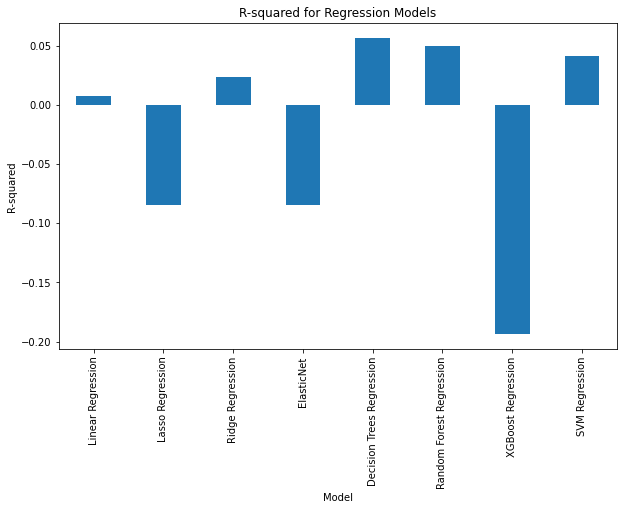

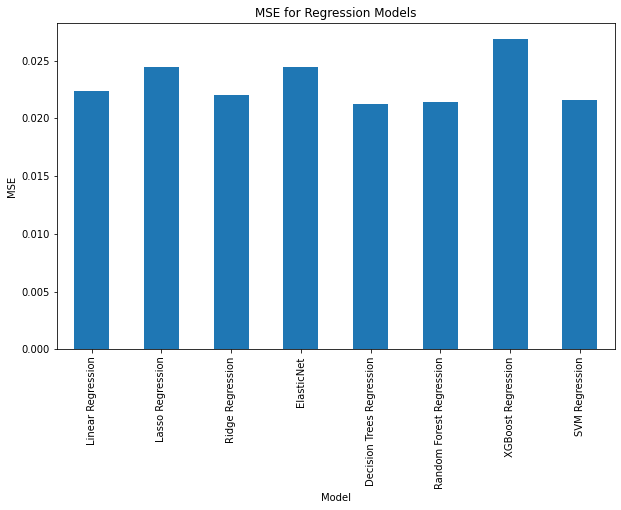

In [39]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


# Results from the baseline models
Removing tax variable improved the results for R2. 

After performing feature importance, we removed less important features and kept the most important ones, and reran the code. 

The results from this model is better. Now, there are more models with positive R2.

On the other hand, there is no significant decrease in MSE in all the models under the different prediction strategies. 

We should take into consideration this finding to improve the prediction results.

In order to do that, we will add more observations to data to see if larger data will help improve the prediction results. 

Also, we will convert ln values of the numeric variables to the original levels and do EDA and feature engineering accordingly to see if there will be an improvement in the prediction results. 

Lastly, based on the above results, Ridge regression has the highest R-squared value (0.0449) and the lowest RMSE (0.1467) among the models provided. Therefore, Ridge regression may be considered the best model for prediction.

Linear Regression
R-squared: 0.007883997705066093
Mean Squared Error: 0.02236001836466891
Root Mean Squared Error: 0.14953266654704217

Lasso
R-squared: -0.08437362319708974
Mean Squared Error: 0.02443929346242065
Root Mean Squared Error: 0.1563307182303614

Ridge
R-squared: 0.044930922370682636
Mean Squared Error: 0.02152506568377118
Root Mean Squared Error: 0.14671423136073466

ElasticNet
R-squared: -0.08437362319708974
Mean Squared Error: 0.02443929346242065
Root Mean Squared Error: 0.1563307182303614

Decision Tree
R-squared: -0.21475425914802315
Mean Squared Error: 0.02737777384930733
Root Mean Squared Error: 0.1654623034086838

Random Forest
R-squared: 0.04961362229749611
Mean Squared Error: 0.02141952837148352
Root Mean Squared Error: 0.14635411976259335

XGBoost
R-squared: -0.1939629490211896
Mean Squared Error: 0.026909185422967923
Root Mean Squared Error: 0.16404019453465643

Support Vector Regression
R-squared: 0.04154999089523814
Mean Squared Error: 0.021601264121963646
Roo

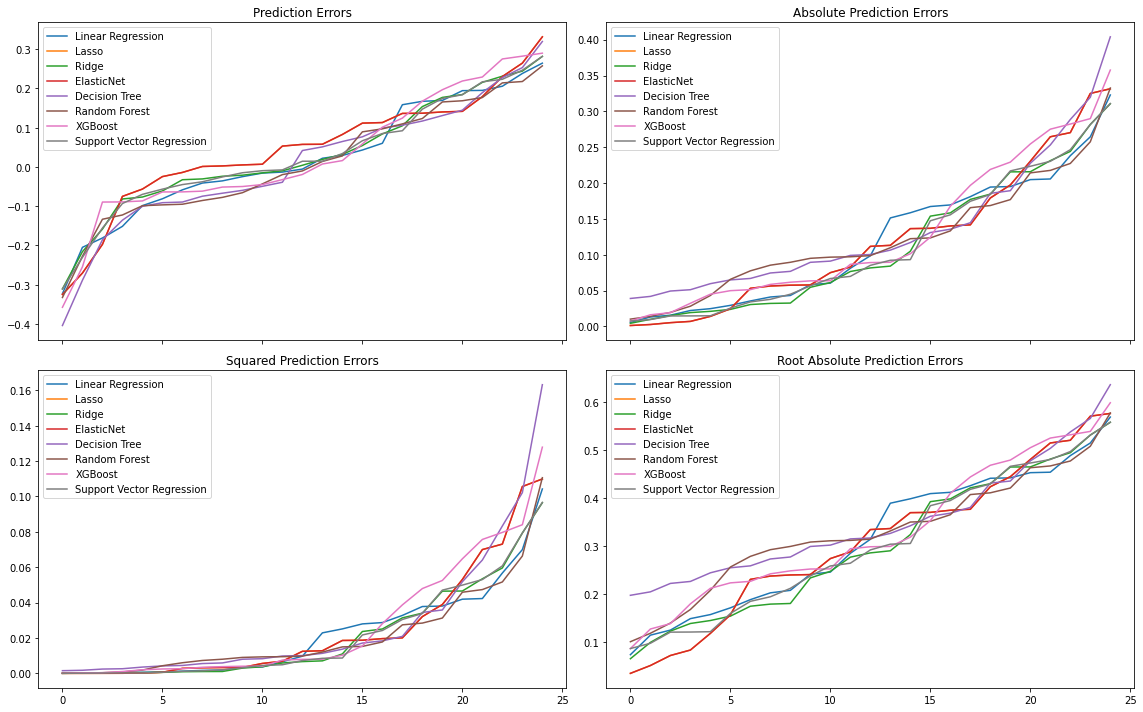

In [40]:
# Visualize the results as prediction errors and loss values for model 3. 
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df

# split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the R-squared, mean squared error, and root mean squared error
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}\n")

    # Visualize the prediction errors and loss values as curves
    axes[0, 0].plot(sorted(errors), label=name)
    axes[0, 0].set_title("Prediction Errors")
    axes[0, 0].legend()

    axes[0, 1].plot(sorted(np.abs(errors)), label=name)
    axes[0, 1].set_title("Absolute Prediction Errors")
    axes[0, 1].legend()

    axes[1, 0].plot(sorted(errors ** 2), label=name)
    axes[1, 0].set_title("Squared Prediction Errors")
    axes[1, 0].legend()

    axes[1, 1].plot(sorted(np.sqrt(np.abs(errors))), label=name)
    axes[1, 1].set_title("Root Absolute Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


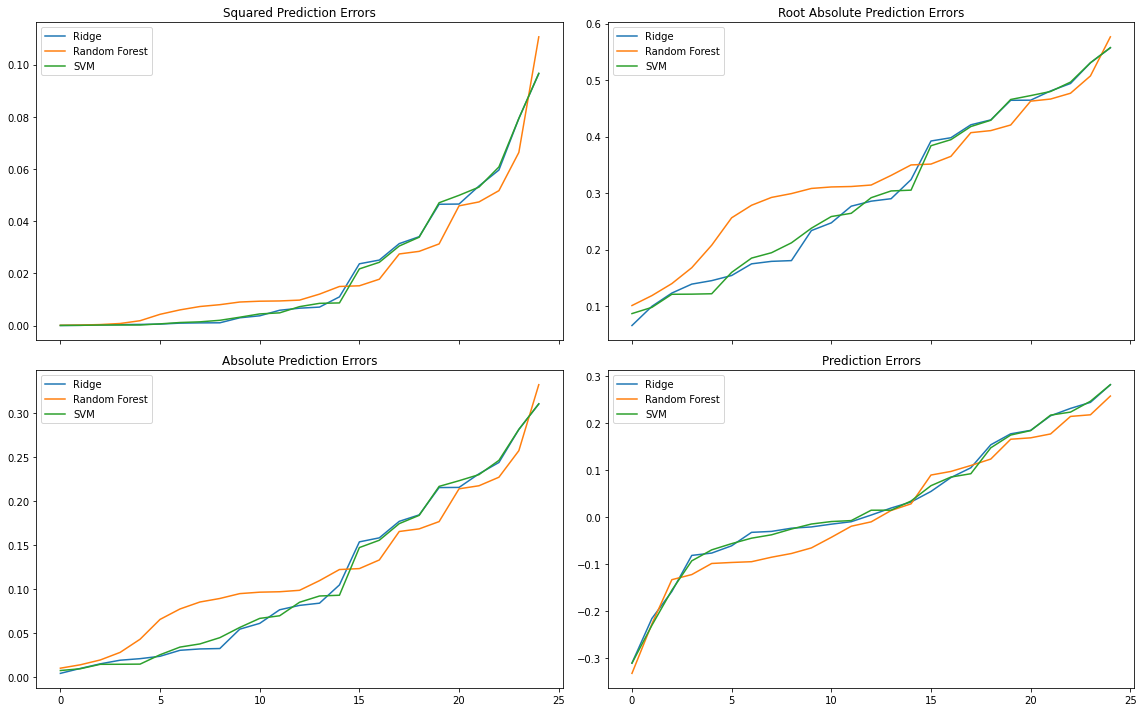

In [41]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df

# Split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(),
    # Add other models here if needed
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


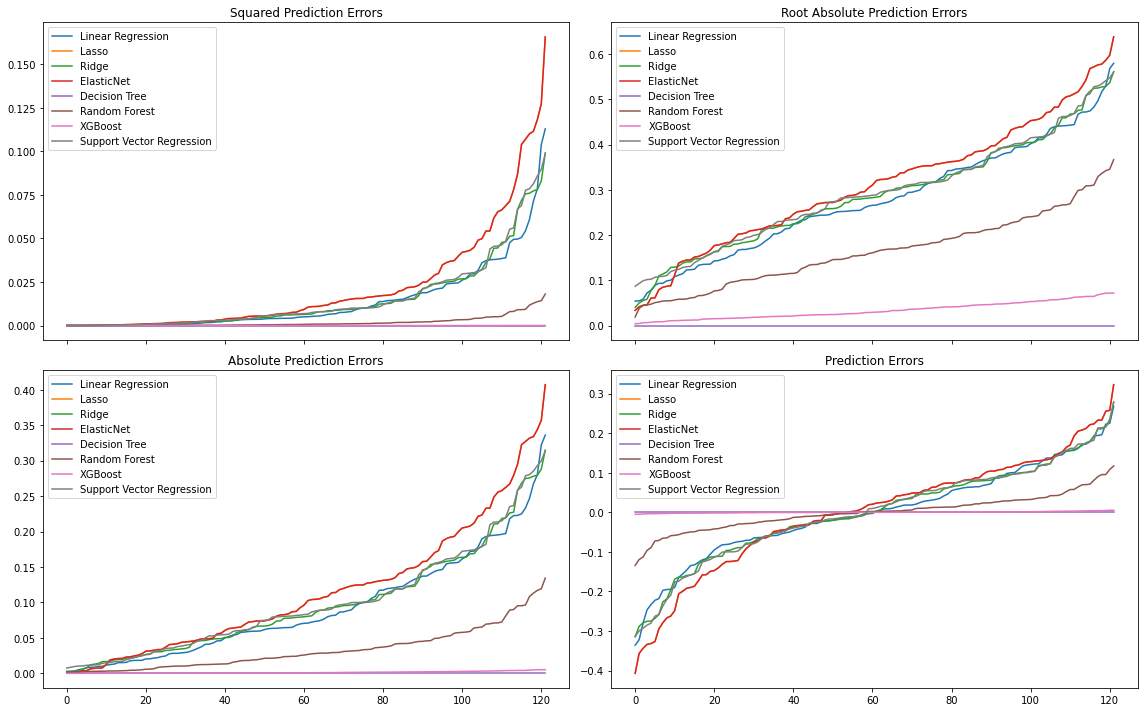

In [42]:
# Load the data
data = df

# Extract features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Calculate the prediction errors
    errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


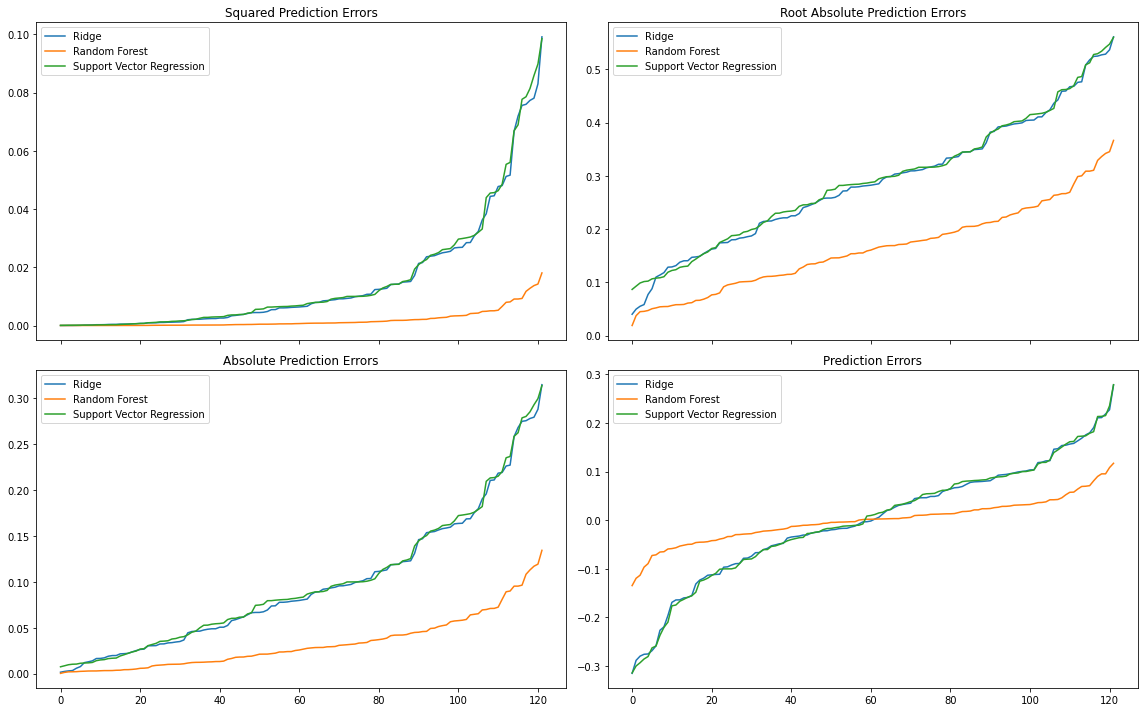

In [43]:
# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Calculate the prediction errors
    errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


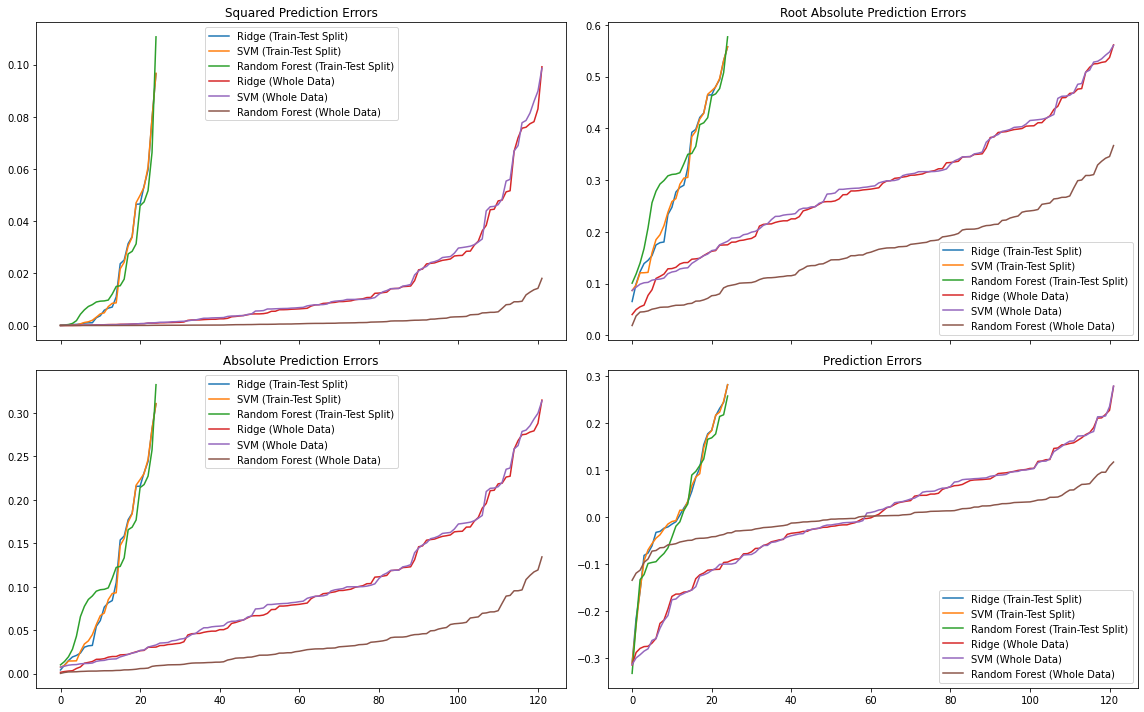

In [44]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df

# Split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the prediction errors
        errors = y_test - y_pred
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the prediction errors
        errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [45]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df

# Split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Ridge (Train-Test Split)       0.0449          0.0215               0.1467                   
SVM (Train-Test Split)         0.0415          0.0216               0.1470                   
Random Forest (Train-Test Split) 0.0496          0.0214               0.1464                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Ridge (Whole Data)             0.3073          0.0152               0.1232                   
SVM (Whole Data)               0.2826          0.0157               0.1254                   
Random Forest (Whole Data)     0.9098          0.0020               0.0445                   


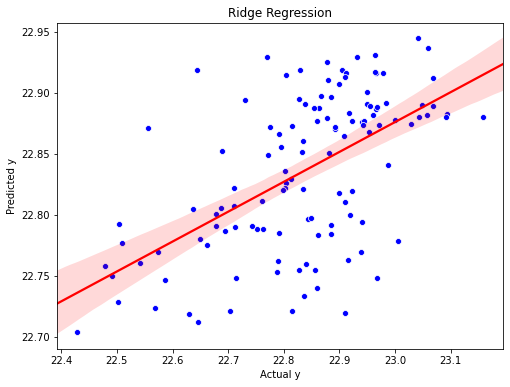

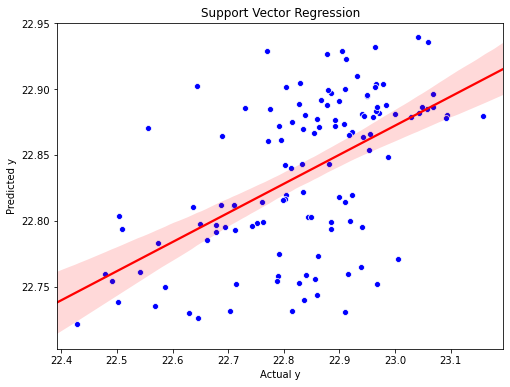

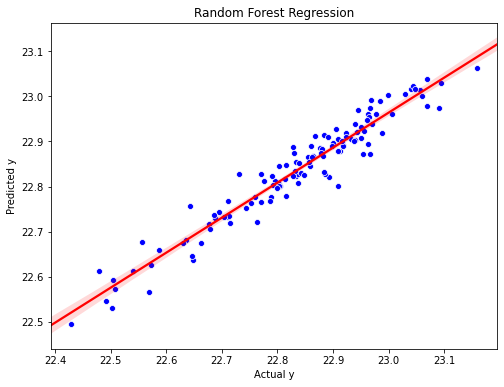

In [46]:
from xgboost import XGBRegressor

# Load the data
data = df

# Split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# Instantiate the Ridge model
ridge_model = Ridge()

# Fit the Ridge model to the entire data
ridge_model.fit(X, y)

# Make predictions on the entire data for Ridge
y_pred_ridge = ridge_model.predict(X)

# Instantiate the SVR model
svm_model = SVR()

# Fit the SVR model to the entire data
svm_model.fit(X, y)

# Make predictions on the entire data for SVM
y_pred_svm = svm_model.predict(X)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model to the entire data
rf_model.fit(X, y)

# Make predictions on the entire data for Random Forest
y_pred_rf = rf_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Ridge
results_df_ridge = pd.DataFrame({'Actual': y, 'Predicted': y_pred_ridge, 'Errors': y - y_pred_ridge})

# Create a DataFrame to hold the actual y values, predicted values, and errors for SVM
results_df_svm = pd.DataFrame({'Actual': y, 'Predicted': y_pred_svm, 'Errors': y - y_pred_svm})

# Create a DataFrame to hold the actual y values, predicted values, and errors for Random Forest
results_df_rf = pd.DataFrame({'Actual': y, 'Predicted': y_pred_rf, 'Errors': y - y_pred_rf})

# Plot the actual y values against the predicted values for Ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_ridge, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_ridge, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Ridge Regression")

# Show the plot for Ridge
plt.show()

# Plot the actual y values against the predicted values for SVM
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_svm, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_svm, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Support Vector Regression")

# Show the plot for SVM
plt.show()

# Plot the actual y values against the predicted values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_rf, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_rf, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Random Forest Regression")

# Show the plot for Random Forest
plt.show()


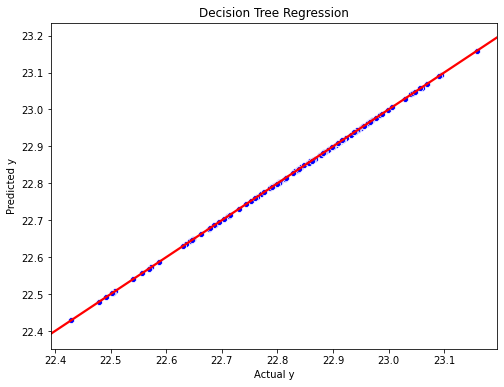

In [47]:
# Load the data
data = df

# Split the data into features and target variable
X = data.drop(['Date', 'lncons', 'lntax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['lncons']

# Instantiate and fit the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42).fit(X, y)

# Make predictions on the entire data for Decision Tree
y_pred_dt = dt_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Decision Tree
results_df_dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred_dt, 'Errors': y - y_pred_dt})

# Plot the actual y values against the predicted values for Decision Tree
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_dt, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_dt, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Decision Tree Regression")

# Show the plot for Decision Tree
plt.show()


In [48]:
# PREDICTION MODEL 4: In this model, we will use larger dataset because the results from the baseline models suggest that it is possible to improve R2 but not MSE. But, if we pick the best model from train-test split results and run the same code on the whole sample there is improvement in both R2 and MSE scores. Accordingly, in order to see if there will be more improvement especially in MSE values for different algorithms, we will use larger data in this prediction strategy.
# On the other hand, we will use data at its original level to do EDA from scratch with larger data. 
# Create a copy of the DataFrame to convert ln values to original levels
df_original = df.copy()

# Convert logarithmic values to original levels
df_original['cons'] = np.exp(df['lncons'])
df_original['price'] = np.exp(df['lnprice'])
df_original['tax'] = np.exp(df['lntax'])
df_original['tipi'] = np.exp(df['lntipi'])

# Drop the logarithmic columns
df_original.drop(['lncons', 'lnprice', 'lntax', 'lntipi'], axis=1, inplace=True)
df_original

Date  D1july09reg  D2jan10tax  D3oct11tax  D4jul12reg  \
0   2005-01-01          0.0         0.0         0.0         0.0   
1   2005-02-01          0.0         0.0         0.0         0.0   
2   2005-03-01          0.0         0.0         0.0         0.0   
3   2005-04-01          0.0         0.0         0.0         0.0   
4   2005-05-01          0.0         0.0         0.0         0.0   
..         ...          ...         ...         ...         ...   
117 2014-10-01          1.0         1.0         1.0         1.0   
118 2014-11-01          1.0         1.0         1.0         1.0   
119 2014-12-01          1.0         1.0         1.0         1.0   
120 2015-01-01          1.0         1.0         1.0         1.0   
121 2015-02-01          1.0         1.0         1.0         1.0   

     D5jan13mixstrtgy          cons     price     tax   tipi  
0                 0.0  7.746867e+09  1.860387  0.0100   84.9  
1                 0.0  8.860697e+09  1.803451  0.0100   73.6  
2                 0.0  8.616757e+09  1.861943  0.0100   82.9  
3                 0.0  8.929091e+09  1.859047  0.0100   77.6  
4                 0.0  9.397903e+09  1.832239  0.0100   83.0  
..                ...           ...       ...     ...    ...  
117               1.0  8.483982e+09  2.963236  0.1875  132.9  
118               1.0  7.906095e+09  2.948762  0.1875  132.5  
119               1.0  9.804085e+09  2.957046  0.1875  128.1  
120               1.0  6.157342e+09  2.915907  0.1875  109.5  
121               1.0  5.863154e+09  2.965889  0.1875  106.8  

[122 rows x 10 columns]

In [49]:
# Add more observations.
# Repeat the existing DataFrame 100 times
df_extended = pd.concat([df_original] * 100, ignore_index=True)
# Verify the number of rows in the extended DataFrame
print("Number of rows in the extended DataFrame:", len(df_extended))
df_extended

Number of rows in the extended DataFrame: 12200


Date  D1july09reg  D2jan10tax  D3oct11tax  D4jul12reg  \
0     2005-01-01          0.0         0.0         0.0         0.0   
1     2005-02-01          0.0         0.0         0.0         0.0   
2     2005-03-01          0.0         0.0         0.0         0.0   
3     2005-04-01          0.0         0.0         0.0         0.0   
4     2005-05-01          0.0         0.0         0.0         0.0   
...          ...          ...         ...         ...         ...   
12195 2014-10-01          1.0         1.0         1.0         1.0   
12196 2014-11-01          1.0         1.0         1.0         1.0   
12197 2014-12-01          1.0         1.0         1.0         1.0   
12198 2015-01-01          1.0         1.0         1.0         1.0   
12199 2015-02-01          1.0         1.0         1.0         1.0   

       D5jan13mixstrtgy          cons     price     tax   tipi  
0                   0.0  7.746867e+09  1.860387  0.0100   84.9  
1                   0.0  8.860697e+09  1.803451  0.0100   73.6  
2                   0.0  8.616757e+09  1.861943  0.0100   82.9  
3                   0.0  8.929091e+09  1.859047  0.0100   77.6  
4                   0.0  9.397903e+09  1.832239  0.0100   83.0  
...                 ...           ...       ...     ...    ...  
12195               1.0  8.483982e+09  2.963236  0.1875  132.9  
12196               1.0  7.906095e+09  2.948762  0.1875  132.5  
12197               1.0  9.804085e+09  2.957046  0.1875  128.1  
12198               1.0  6.157342e+09  2.915907  0.1875  109.5  
12199               1.0  5.863154e+09  2.965889  0.1875  106.8  

[12200 rows x 10 columns]

In [50]:
df_extended.columns

Index(['Date', 'D1july09reg', 'D2jan10tax', 'D3oct11tax', 'D4jul12reg',
       'D5jan13mixstrtgy', 'cons', 'price', 'tax', 'tipi'],
      dtype='object')

In [51]:
# Create the interaction variable
df_extended['price_tax_interaction'] = df_extended['price'] * df_extended['tax']
df_extended['regulation_tax_interaction_10'] = df_extended['D1july09reg'] * df_extended['D2jan10tax']
df_extended['regulation_tax_interaction_12'] = df_extended['D3oct11tax'] * df_extended['D4jul12reg']

In [52]:
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           12200 non-null  datetime64[ns]
 1   D1july09reg                    12200 non-null  float64       
 2   D2jan10tax                     12200 non-null  float64       
 3   D3oct11tax                     12200 non-null  float64       
 4   D4jul12reg                     12200 non-null  float64       
 5   D5jan13mixstrtgy               12200 non-null  float64       
 6   cons                           12200 non-null  float64       
 7   price                          12200 non-null  float64       
 8   tax                            12200 non-null  float64       
 9   tipi                           12200 non-null  float64       
 10  price_tax_interaction          12200 non-null  float64       
 11  regulation_tax_

In [53]:
#Create df_num for numeric features 
df_num1 = df_extended[['cons', 'price', 'tax', 'tipi', 'price_tax_interaction']].copy()
df_num1

cons     price     tax   tipi  price_tax_interaction
0      7.746867e+09  1.860387  0.0100   84.9               0.018604
1      8.860697e+09  1.803451  0.0100   73.6               0.018035
2      8.616757e+09  1.861943  0.0100   82.9               0.018619
3      8.929091e+09  1.859047  0.0100   77.6               0.018590
4      9.397903e+09  1.832239  0.0100   83.0               0.018322
...             ...       ...     ...    ...                    ...
12195  8.483982e+09  2.963236  0.1875  132.9               0.555607
12196  7.906095e+09  2.948762  0.1875  132.5               0.552893
12197  9.804085e+09  2.957046  0.1875  128.1               0.554446
12198  6.157342e+09  2.915907  0.1875  109.5               0.546733
12199  5.863154e+09  2.965889  0.1875  106.8               0.556104

[12200 rows x 5 columns]

In [54]:
#Create df_num for categorical features 
df_cat1 = df_extended[['D1july09reg', 'D2jan10tax', 'D3oct11tax', 'D4jul12reg', 'D5jan13mixstrtgy', 'regulation_tax_interaction_10', 'regulation_tax_interaction_12']].copy()
df_cat1

D1july09reg  D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  \
0              0.0         0.0         0.0         0.0               0.0   
1              0.0         0.0         0.0         0.0               0.0   
2              0.0         0.0         0.0         0.0               0.0   
3              0.0         0.0         0.0         0.0               0.0   
4              0.0         0.0         0.0         0.0               0.0   
...            ...         ...         ...         ...               ...   
12195          1.0         1.0         1.0         1.0               1.0   
12196          1.0         1.0         1.0         1.0               1.0   
12197          1.0         1.0         1.0         1.0               1.0   
12198          1.0         1.0         1.0         1.0               1.0   
12199          1.0         1.0         1.0         1.0               1.0   

       regulation_tax_interaction_10  regulation_tax_interaction_12  
0                                0.0                            0.0  
1                                0.0                            0.0  
2                                0.0                            0.0  
3                                0.0                            0.0  
4                                0.0                            0.0  
...                              ...                            ...  
12195                            1.0                            1.0  
12196                            1.0                            1.0  
12197                            1.0                            1.0  
12198                            1.0                            1.0  
12199                            1.0                            1.0  

[12200 rows x 7 columns]

In [55]:
# EDA and Feature Engineering for numerical variables
df_num1.describe()

cons         price           tax          tipi  \
count  1.220000e+04  12200.000000  12200.000000  12200.000000   
mean   8.358066e+09      2.588430      0.105005    102.269672   
std    1.189981e+09      0.429917      0.048356     12.814771   
min    5.503534e+09      1.803451      0.010000     73.600000   
25%    7.669272e+09      2.194678      0.070000     92.700000   
50%    8.451553e+09      2.745080      0.102500    101.500000   
75%    9.179923e+09      2.965889      0.145000    111.700000   
max    1.141759e+10      3.302962      0.187500    132.900000   

       price_tax_interaction  
count           12200.000000  
mean                0.290638  
std                 0.167642  
min                 0.018035  
25%                 0.157211  
50%                 0.281371  
75%                 0.439521  
max                 0.584951

In [56]:
# Check if there is missing values in df_num
missing_values = df_num1.isnull().sum()
print(missing_values)

cons                     0
price                    0
tax                      0
tipi                     0
price_tax_interaction    0
dtype: int64


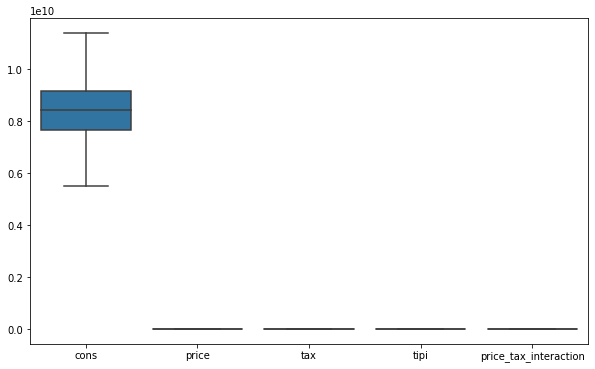

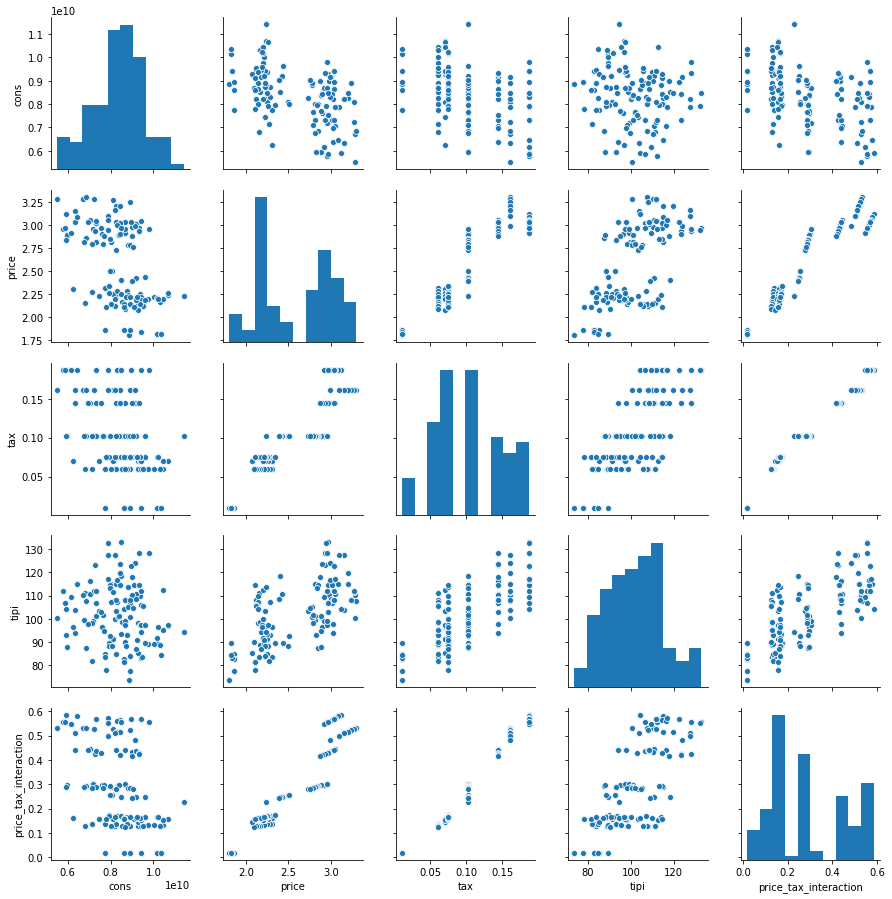

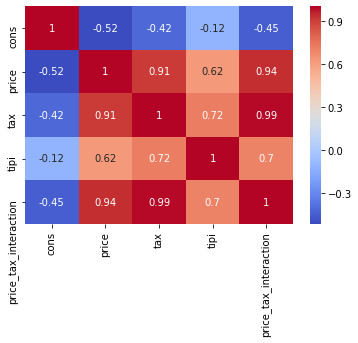

In [57]:
#Create visualizations to explore the distribution and relationships of the numerical variables. Some common plots include histograms, box plots, scatter plots, and correlation matrices.
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num1)
plt.show()

# Scatter plot matrix
sns.pairplot(df_num1)
plt.show()

# Correlation matrix
correlation_matrix = df_num1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [58]:
#Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num1), columns=df_num1.columns)
df_num_scaled

cons     price       tax      tipi  price_tax_interaction
0     -0.513642 -1.693519 -1.964781 -1.355497              -1.622773
1      0.422403 -1.825959 -1.964781 -2.237328              -1.626170
2      0.217400 -1.689901 -1.964781 -1.511573              -1.622680
3      0.479881 -1.696636 -1.964781 -1.925175              -1.622853
4      0.873862 -1.758994 -1.964781 -1.503769              -1.624452
...         ...       ...       ...       ...                    ...
12195  0.105817  0.871845  1.706067  2.390334               1.580628
12196 -0.379829  0.838177  1.706067  2.359119               1.564439
12197  1.215211  0.857445  1.706067  2.015751               1.573704
12198 -1.849454  0.761751  1.706067  0.564241               1.527690
12199 -2.096684  0.878015  1.706067  0.353538               1.583595

[12200 rows x 5 columns]

In [59]:
# EDA and Feature Engineering for numerical variables
df_num_scaled.describe()

cons         price           tax          tipi  \
count  1.220000e+04  1.220000e+04  1.220000e+04  1.220000e+04   
mean   7.568809e-16  2.334744e-16 -4.076521e-16 -6.370132e-20   
std    1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00   
min   -2.398904e+00 -1.825959e+00 -1.964781e+00 -2.237328e+00   
25%   -5.788518e-01 -9.159177e-01 -7.239309e-01 -7.467995e-01   
50%    7.856467e-02  3.643868e-01 -5.180379e-02 -6.006379e-02   
75%    6.906752e-01  8.780145e-01  8.271316e-01  7.359253e-01   
max    2.571175e+00  1.662088e+00  1.706067e+00  2.390334e+00   

       price_tax_interaction  
count           1.220000e+04  
mean            5.824121e-19  
std             1.000041e+00  
min            -1.626170e+00  
25%            -7.959351e-01  
50%            -5.528148e-02  
75%             8.881361e-01  
max             1.755674e+00

Explained Variance Ratio for PC1: 0.7358206112683643
Explained Variance Ratio for PC2: 0.1812198834172486
Explained Variance Ratio for PC3: 0.063261974409785
Explained Variance Ratio for PC4: 0.018450325934514726
Explained Variance Ratio for PC5: 0.0012472049700873677


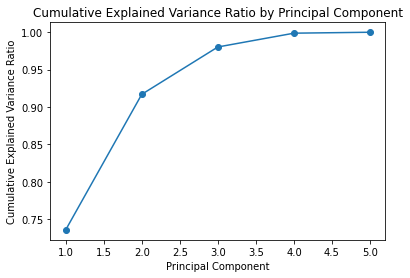

In [60]:
# Instantiate PCA with the number of components equal to the number of columns in the scaled numerical data
pca = PCA(n_components=5)

# Apply PCA to the scaled numerical data
pca.fit(df_num_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for PC{i+1}: {ratio}")

# Plot the cumulative explained variance ratio
plt.plot(range(1, 6), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Component')
plt.show()


Variable Contributions for PCs:
         cons     price       tax      tipi  price_tax_interaction
PC1  0.278439 -0.495903 -0.507120 -0.397004              -0.511634
PC2 -0.848174  0.074928 -0.088999 -0.514675              -0.046635
PC3 -0.444085 -0.319438 -0.244707  0.752423              -0.273359
PC4 -0.076408 -0.791171  0.522854 -0.105879               0.289178
PC5  0.004743 -0.143090 -0.633759  0.012074               0.760070


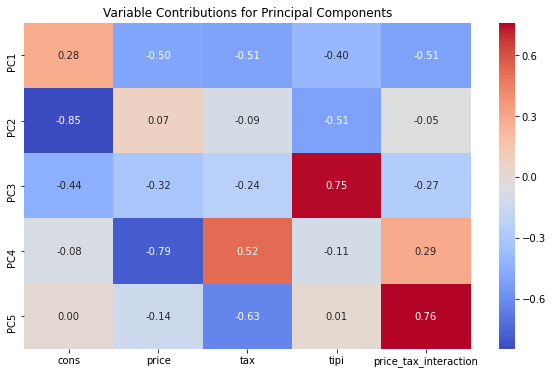

In [61]:
# Instantiate PCA with the number of components equal to the number of columns in the scaled numerical data
pca = PCA(n_components=5)

# Apply PCA to the scaled numerical data
pca.fit(df_num_scaled)

# Get the contribution of each original variable to the principal components
variable_contributions = pca.components_

# Create a DataFrame to hold the variable contributions
contributions_df = pd.DataFrame(variable_contributions, columns=df_num_scaled.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Print the variable contributions for PCs
print("Variable Contributions for PCs:")
print(contributions_df)

# Create a heatmap to visualize the variable contributions
plt.figure(figsize=(10, 6))
sns.heatmap(contributions_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Variable Contributions for Principal Components")
plt.show()


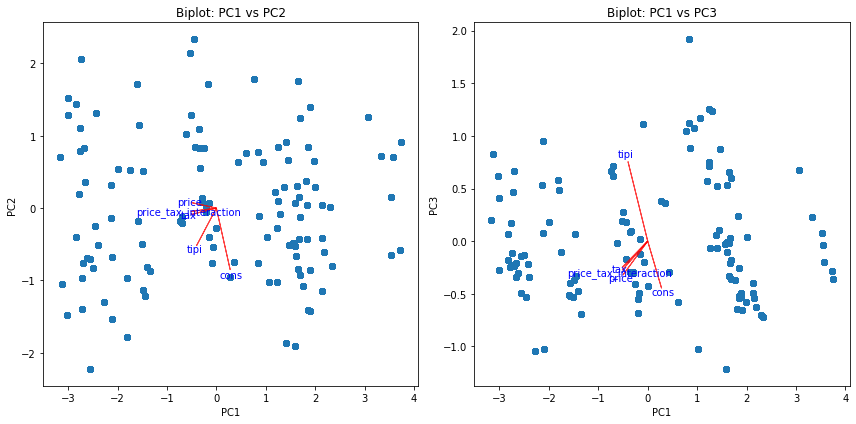

In [62]:
# Instantiate PCA with the number of components equal to the number of columns in the scaled numerical data
pca = PCA(n_components=5)

# Apply PCA to the scaled numerical data
pca.fit(df_num_scaled)

# Get the principal components
principal_components = pca.transform(df_num_scaled)

# Create a DataFrame to hold the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Get the contribution of each original variable to the principal components
variable_contributions = pca.components_

# Create a DataFrame to hold the variable contributions
contributions_df = pd.DataFrame(variable_contributions.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_num_scaled.columns)

# Create biplots
plt.figure(figsize=(12, 6))

# Biplot for PC1 and PC2
plt.subplot(1, 2, 1)
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
for variable in contributions_df.index:
    plt.arrow(0, 0, contributions_df.loc[variable, 'PC1'], contributions_df.loc[variable, 'PC2'], color='r', alpha=0.75)
    plt.text(contributions_df.loc[variable, 'PC1']*1.1, contributions_df.loc[variable, 'PC2']*1.1, variable, color='b', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot: PC1 vs PC2')

# Biplot for PC1 and PC3
plt.subplot(1, 2, 2)
plt.scatter(principal_df['PC1'], principal_df['PC3'], alpha=0.5)
for variable in contributions_df.index:
    plt.arrow(0, 0, contributions_df.loc[variable, 'PC1'], contributions_df.loc[variable, 'PC3'], color='r', alpha=0.75)
    plt.text(contributions_df.loc[variable, 'PC1']*1.1, contributions_df.loc[variable, 'PC3']*1.1, variable, color='b', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('Biplot: PC1 vs PC3')

plt.tight_layout()
plt.show()

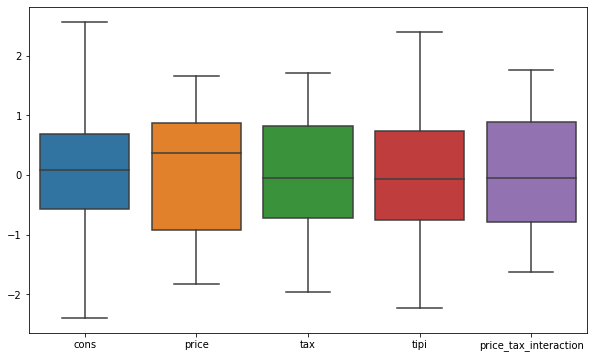

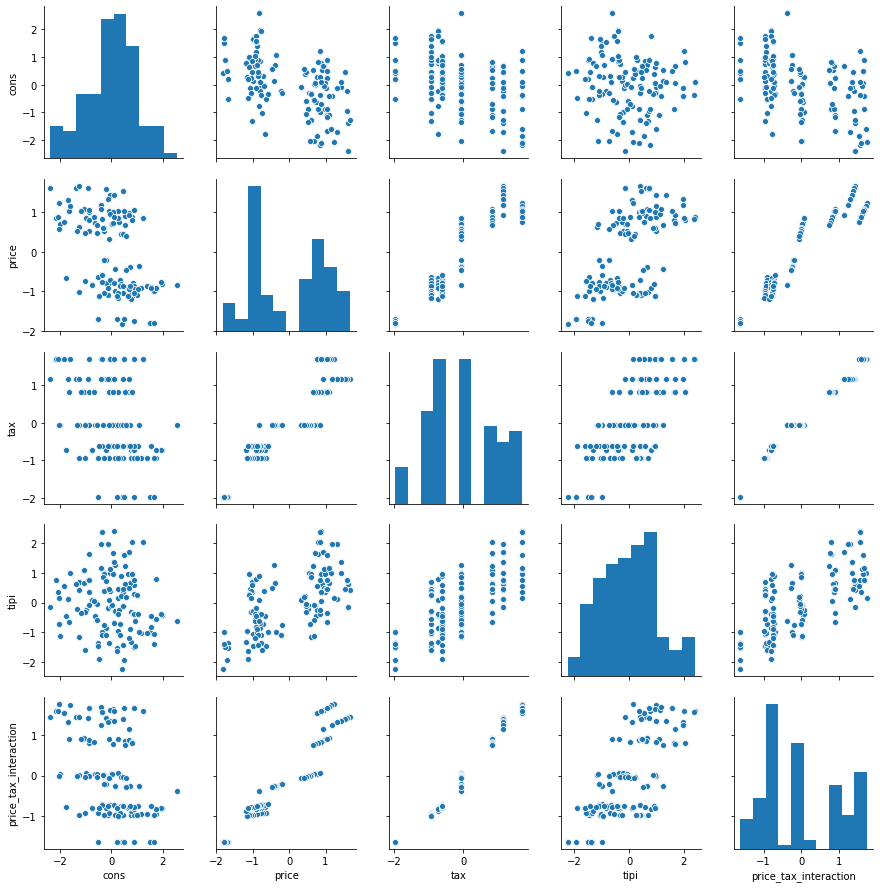

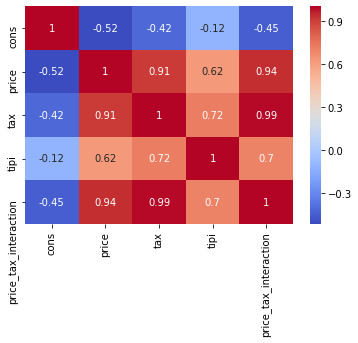

In [63]:
#Create visualizations to explore the distribution and relationships of the numerical variables. Some common plots include histograms, box plots, scatter plots, and correlation matrices.
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num_scaled)
plt.show()

# Scatter plot matrix
sns.pairplot(df_num_scaled)
plt.show()

# Correlation matrix
correlation_matrix = df_num_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [64]:
#Check skewness in numerical variables 
skewness = df_num_scaled.skew()
print(skewness)

cons                    -0.204756
price                   -0.060101
tax                      0.175276
tipi                     0.163189
price_tax_interaction    0.340214
dtype: float64


cons: With a skewness of -0.204731, the distribution of cons is slightly left-skewed. This means that the tail of the distribution is longer on the left side, indicating a concentration of lower values.

price: The skewness value of -0.060094 suggests a very slight left-skewness in the distribution of price. The data is nearly symmetrical, but there might be a slight concentration of values towards the higher end.

tax: The skewness of 0.175254 indicates a slightly right-skewed distribution for tax. The tail of the distribution extends more towards the right side, suggesting a concentration of higher values.

tipi: With a skewness value of 0.163169, the distribution of tipi is also slightly right-skewed. This indicates a concentration of higher values, with the tail of the distribution extending towards the right side.

price_tax_interaction: Skewness value of 0.340176. This indicates that the distribution of the price_tax_interaction variable is moderately positively skewed.

In short, after scaling, the skewness values suggest that the distributions of cons, price, tax, and tipi are relatively symmetrical, with only slight deviations towards the left or right side. The magnitude of skewness is relatively small for all variables, indicating a moderate departure from perfect symmetry.

In [65]:
#EDA for df_cat
for column in df_cat1.columns:
    print(df_cat1[column].value_counts())

1.0    6800
0.0    5400
Name: D1july09reg, dtype: int64
1.0    6200
0.0    6000
Name: D2jan10tax, dtype: int64
0.0    8100
1.0    4100
Name: D3oct11tax, dtype: int64
0.0    9000
1.0    3200
Name: D4jul12reg, dtype: int64
0.0    9600
1.0    2600
Name: D5jan13mixstrtgy, dtype: int64
1.0    6200
0.0    6000
Name: regulation_tax_interaction_10, dtype: int64
0.0    9000
1.0    3200
Name: regulation_tax_interaction_12, dtype: int64


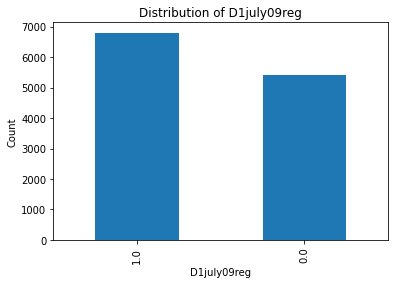

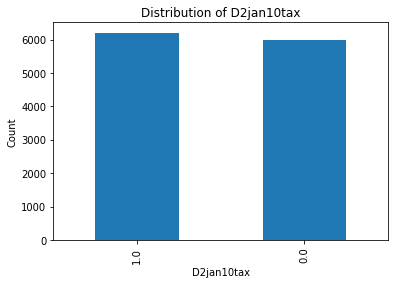

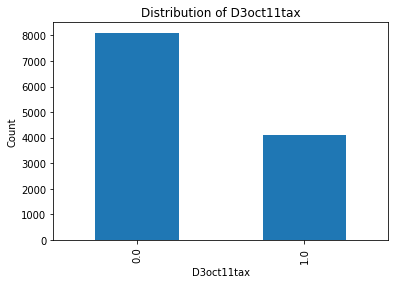

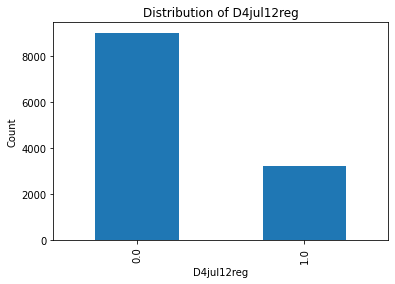

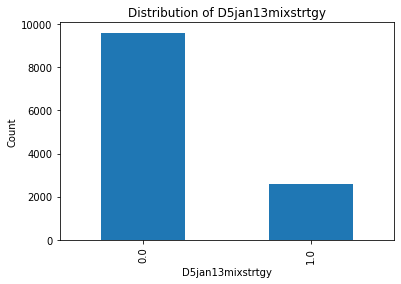

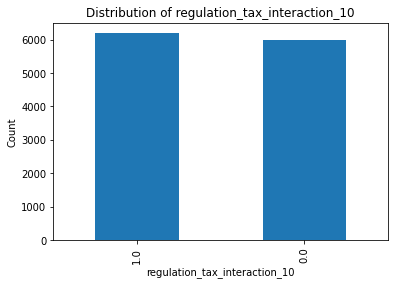

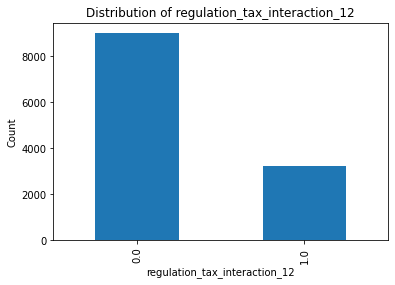

In [66]:
#Visualize the distributions. Plotting bar charts or pie charts can provide a visual representation of the distribution of categorical variables.
for column in df_cat1.columns:
    plt.figure()
    df_cat1[column].value_counts().plot(kind='bar')
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [67]:
# Concatenate df_num_scaled and df_cat into a new DataFrame df_new, 
df_new = pd.concat([df_num_scaled, df_cat1], axis=1)
df_new

cons     price       tax      tipi  price_tax_interaction  \
0     -0.513642 -1.693519 -1.964781 -1.355497              -1.622773   
1      0.422403 -1.825959 -1.964781 -2.237328              -1.626170   
2      0.217400 -1.689901 -1.964781 -1.511573              -1.622680   
3      0.479881 -1.696636 -1.964781 -1.925175              -1.622853   
4      0.873862 -1.758994 -1.964781 -1.503769              -1.624452   
...         ...       ...       ...       ...                    ...   
12195  0.105817  0.871845  1.706067  2.390334               1.580628   
12196 -0.379829  0.838177  1.706067  2.359119               1.564439   
12197  1.215211  0.857445  1.706067  2.015751               1.573704   
12198 -1.849454  0.761751  1.706067  0.564241               1.527690   
12199 -2.096684  0.878015  1.706067  0.353538               1.583595   

       D1july09reg  D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  \
0              0.0         0.0         0.0         0.0               0.0   
1              0.0         0.0         0.0         0.0               0.0   
2              0.0         0.0         0.0         0.0               0.0   
3              0.0         0.0         0.0         0.0               0.0   
4              0.0         0.0         0.0         0.0               0.0   
...            ...         ...         ...         ...               ...   
12195          1.0         1.0         1.0         1.0               1.0   
12196          1.0         1.0         1.0         1.0               1.0   
12197          1.0         1.0         1.0         1.0               1.0   
12198          1.0         1.0         1.0         1.0               1.0   
12199          1.0         1.0         1.0         1.0               1.0   

       regulation_tax_interaction_10  regulation_tax_interaction_12  
0                                0.0                            0.0  
1                                0.0                            0.0  
2                                0.0                            0.0  
3                                0.0                            0.0  
4                                0.0                            0.0  
...                              ...                            ...  
12195                            1.0                            1.0  
12196                            1.0                            1.0  
12197                            1.0                            1.0  
12198                            1.0                            1.0  
12199                            1.0                            1.0  

[12200 rows x 12 columns]

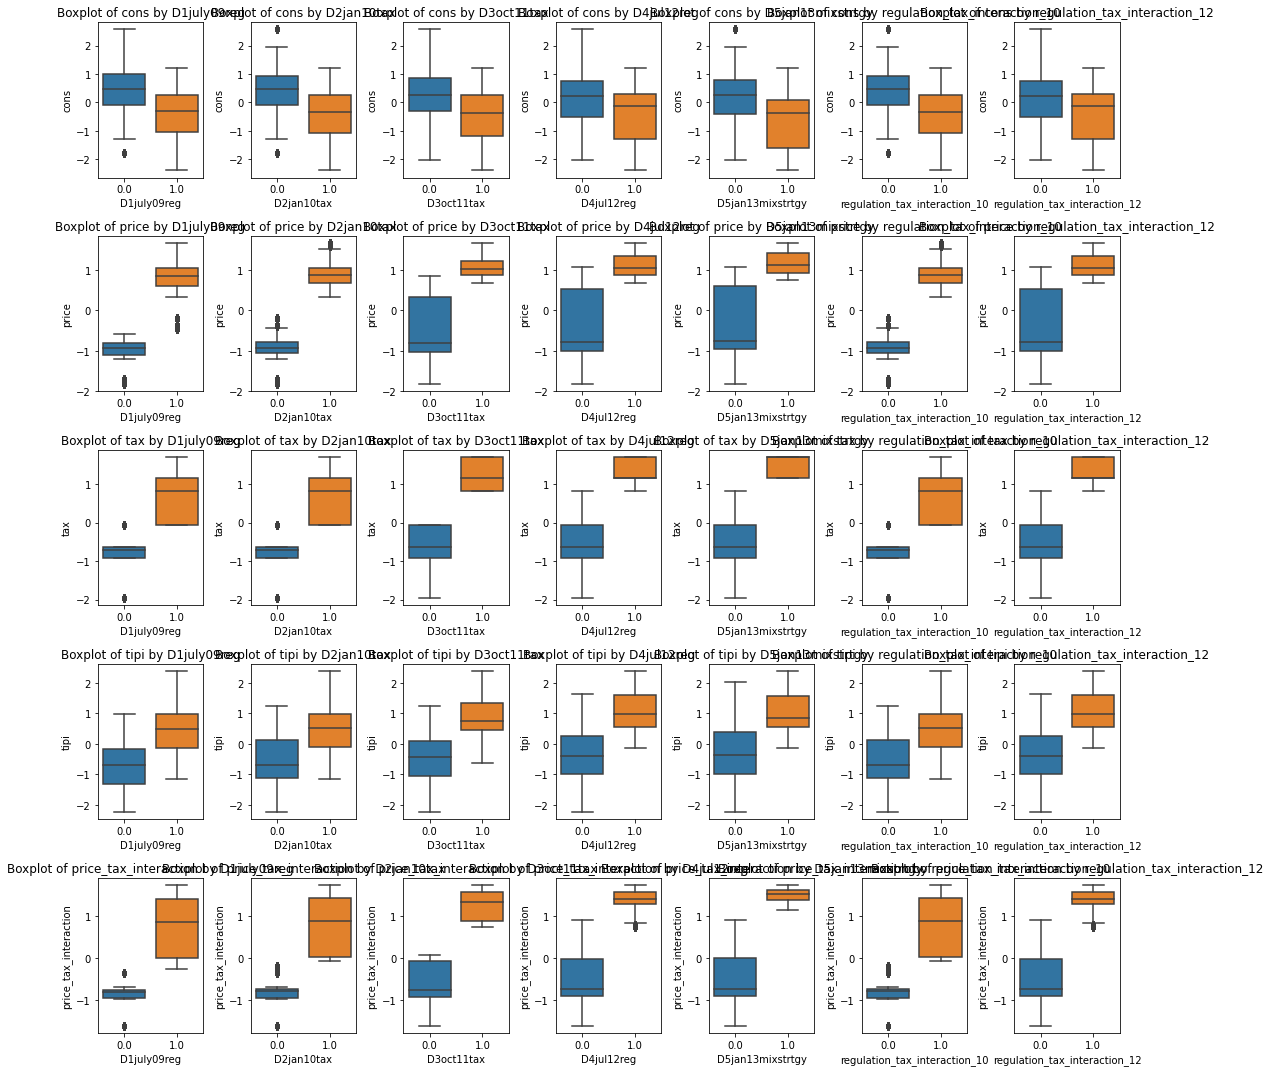

In [68]:
#Visualize the relationships between numerical and categorical variables 
#Boxplot of Numerical Variables by Categorical Variable
num_columns = df_num_scaled.columns
cat_columns = df_cat1.columns
num_rows = len(num_columns)
num_cols = len(cat_columns)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
for i, num_column in enumerate(num_columns):
    for j, cat_column in enumerate(cat_columns):
        ax = axes[i, j]
        sns.boxplot(x=df_new[cat_column], y=df_new[num_column], ax=ax)
        ax.set_title(f"Boxplot of {num_column} by {cat_column}")
        ax.set_xlabel(cat_column)
        ax.set_ylabel(num_column)
plt.tight_layout()
plt.show()

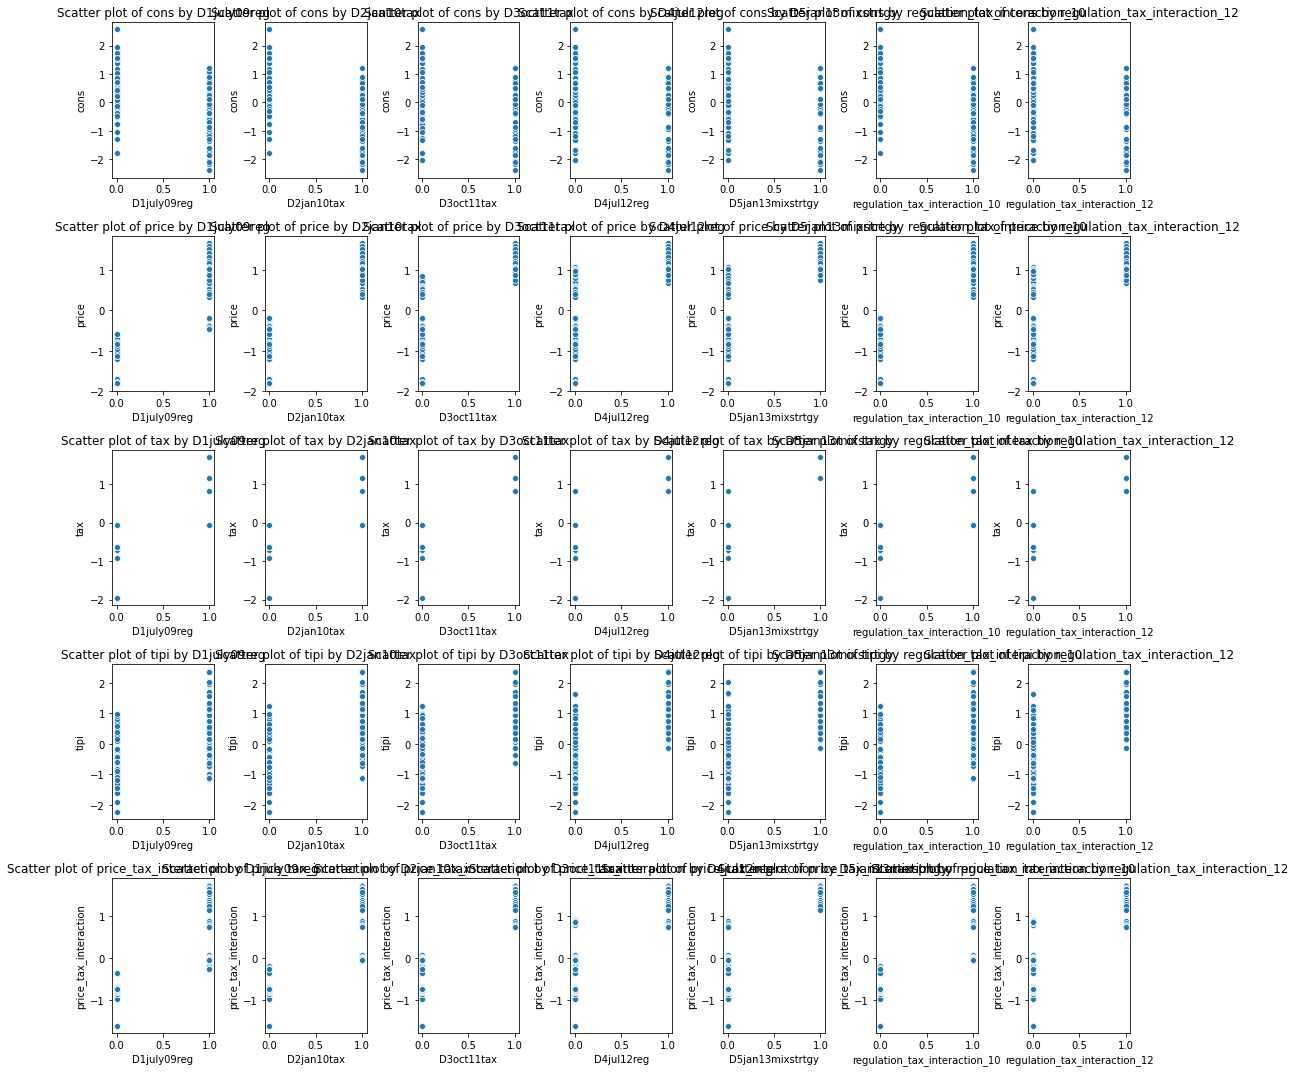

In [69]:
#Visualize the relationships between numerical and categorical variables 
#Scatter plots of Numerical Variables by Categorical Variable
cat_columns = df_cat1.columns
num_rows = len(num_columns)
num_cols = len(cat_columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, num_column in enumerate(num_columns):
    for j, cat_column in enumerate(cat_columns):
        ax = axes[i, j]
        sns.scatterplot(x=df_new[cat_column], y=df_new[num_column], ax=ax)
        ax.set_title(f"Scatter plot of {num_column} by {cat_column}")
        ax.set_xlabel(cat_column)
        ax.set_ylabel(num_column)

plt.tight_layout()
plt.show()


# Estimation using new data with original levels of the variables

In [70]:
m_new = ols('cons ~ price',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     4406.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -15430.
No. Observations:               12200   AIC:                         3.086e+04
Df Residuals:                   12198   BIC:                         3.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.465e-16      0.008   1.09e-13      1.0

In [71]:
m_new = ols('cons ~ price + tax',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     2342.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -15329.
No. Observations:               12200   AIC:                         3.066e+04
Df Residuals:                   12197   BIC:                         3.069e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.465e-16      0.008    1.1e-13      1.0

In [72]:
m_new = ols('cons ~ price+tipi',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     3045.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -14841.
No. Observations:               12200   AIC:                         2.969e+04
Df Residuals:                   12197   BIC:                         2.971e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.465e-16      0.007   1.14e-13      1.0

In [73]:
m_new = ols('cons ~ price+tipi+D1july09reg+D2jan10tax+D3oct11tax+D5jan13mixstrtgy',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1050.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -14770.
No. Observations:               12200   AIC:                         2.955e+04
Df Residuals:                   12193   BIC:                         2.961e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1590      0.032  

In [74]:
m_new = ols('cons ~ tax+tipi+D1july09reg+D2jan10tax+D3oct11tax+D5jan13mixstrtgy',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     972.1
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -14926.
No. Observations:               12200   AIC:                         2.987e+04
Df Residuals:                   12193   BIC:                         2.992e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5548      0.024  

In [75]:
m_new = ols('cons ~ tax+tipi+D1july09reg+D4jul12reg+D5jan13mixstrtgy',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -15009.
No. Observations:               12200   AIC:                         3.003e+04
Df Residuals:                   12194   BIC:                         3.008e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4355      0.021  

In [76]:
m_new = ols('cons ~ price+tipi+D1july09reg+D4jul12reg+D5jan13mixstrtgy',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1345.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -14632.
No. Observations:               12200   AIC:                         2.928e+04
Df Residuals:                   12194   BIC:                         2.932e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0181      0.025  

In [77]:
m_new = ols('cons ~ price+tipi+D2jan10tax+D3oct11tax',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     1528.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -14833.
No. Observations:               12200   AIC:                         2.968e+04
Df Residuals:                   12195   BIC:                         2.971e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0874      0.026      3.411      0.0

In [78]:
m_new = ols('cons ~ price+tipi+D2jan10tax+D3oct11tax+price_tax_interaction',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     1236.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -14811.
No. Observations:               12200   AIC:                         2.963e+04
Df Residuals:                   12194   BIC:                         2.968e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.05

In [79]:
m_new = ols('cons ~ price+tax+tipi+D2jan10tax+D3oct11tax+price_tax_interaction',df_new).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1050.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                -14771.
No. Observations:               12200   AIC:                         2.956e+04
Df Residuals:                   12193   BIC:                         2.961e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.10

# Results from estimations
In all the models, there is improvement in standard errors and R2 values. Using larger data improved the estimation results. Note that standard errors are smaller, and R2 values are slightly higher. However, all the estimated coefficients are not statistically significant. 

# Estimation using numerical variables in logarithmic form

In [80]:
# I will convert the numerical variables in df_num to logarithmic form and concatenate them with df_cat as a new DataFrame named df_ln
# Apply logarithmic transformation to numerical variables in df_num
df_num_ln = np.log(df_num1)
# Concatenate df_cat and df_num_ln
df_ln = pd.concat([df_cat1, df_num_ln], axis=1)
df_ln

D1july09reg  D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  \
0              0.0         0.0         0.0         0.0               0.0   
1              0.0         0.0         0.0         0.0               0.0   
2              0.0         0.0         0.0         0.0               0.0   
3              0.0         0.0         0.0         0.0               0.0   
4              0.0         0.0         0.0         0.0               0.0   
...            ...         ...         ...         ...               ...   
12195          1.0         1.0         1.0         1.0               1.0   
12196          1.0         1.0         1.0         1.0               1.0   
12197          1.0         1.0         1.0         1.0               1.0   
12198          1.0         1.0         1.0         1.0               1.0   
12199          1.0         1.0         1.0         1.0               1.0   

       regulation_tax_interaction_10  regulation_tax_interaction_12  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
12195                            1.0                            1.0   
12196                            1.0                            1.0   
12197                            1.0                            1.0   
12198                            1.0                            1.0   
12199                            1.0                            1.0   

            cons     price       tax      tipi  price_tax_interaction  
0      22.770554  0.620785 -4.605170  4.441474              -3.984386  
1      22.904891  0.589702 -4.605170  4.298645              -4.015468  
2      22.876975  0.621620 -4.605170  4.417635              -3.983550  
3      22.912580  0.620064 -4.605170  4.351567              -3.985106  
4      22.963752  0.605539 -4.605170  4.418841              -3.999631  
...          ...       ...       ...       ...                    ...  
12195  22.861446  1.086282 -1.673976  4.889597              -0.587694  
12196  22.790900  1.081386 -1.673976  4.886583              -0.592591  
12197  23.006065  1.084191 -1.673976  4.852811              -0.589786  
12198  22.540911  1.070181 -1.673976  4.695925              -0.603796  
12199  22.491954  1.087177 -1.673976  4.670958              -0.586800  

[12200 rows x 12 columns]

In [81]:
m_ln = ols('cons ~ price',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     4194.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                 7796.6
No. Observations:               12200   AIC:                        -1.559e+04
Df Residuals:                   12198   BIC:                        -1.557e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2490      0.006   3586.004      0.0

In [82]:
m_ln = ols('cons ~ tax',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1843.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                 6852.2
No. Observations:               12200   AIC:                        -1.370e+04
Df Residuals:                   12198   BIC:                        -1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6405      0.005   4798.702      0.0

In [83]:
m_ln = ols('cons ~ price+tipi',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     3002.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:45   Log-Likelihood:                 8435.9
No. Observations:               12200   AIC:                        -1.687e+04
Df Residuals:                   12197   BIC:                        -1.684e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.5184      0.048    452.633      0.0

In [84]:
m_ln = ols('cons ~ tax+tipi',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1192.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                 7082.7
No. Observations:               12200   AIC:                        -1.416e+04
Df Residuals:                   12197   BIC:                        -1.414e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.2339      0.065    326.295      0.0

In [85]:
m_ln = ols('cons ~ price+tipi+D1july09reg+D2jan10tax+D3oct11tax+D5jan13mixstrtgy',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1063.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                 8561.4
No. Observations:               12200   AIC:                        -1.711e+04
Df Residuals:                   12193   BIC:                        -1.706e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.3028      0.054  

In [86]:
m_ln = ols('cons ~ tax+tipi+D1july09reg+D2jan10tax+D3oct11tax+D5jan13mixstrtgy',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     1004.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                 8442.4
No. Observations:               12200   AIC:                        -1.687e+04
Df Residuals:                   12193   BIC:                        -1.682e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           20.6142      0.061  

In [87]:
m_ln = ols('cons ~ price+tipi+D1july09reg+D5jan13mixstrtgy',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1576.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                 8535.3
No. Observations:               12200   AIC:                        -1.706e+04
Df Residuals:                   12195   BIC:                        -1.702e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.2912      0.051  

In [88]:
df_ln.columns

Index(['D1july09reg', 'D2jan10tax', 'D3oct11tax', 'D4jul12reg',
       'D5jan13mixstrtgy', 'regulation_tax_interaction_10',
       'regulation_tax_interaction_12', 'cons', 'price', 'tax', 'tipi',
       'price_tax_interaction'],
      dtype='object')

In [89]:
m_ln = ols('cons ~ price+tipi+price_tax_interaction+D1july09reg+D2jan10tax+D3oct11tax+D4jul12reg+D5jan13mixstrtgy+regulation_tax_interaction_10+regulation_tax_interaction_12',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     751.7
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                 8686.9
No. Observations:               12200   AIC:                        -1.735e+04
Df Residuals:                   12190   BIC:                        -1.728e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [90]:
m_ln = ols('cons ~ price+tipi+regulation_tax_interaction_10+regulation_tax_interaction_12',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1508.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                 8445.8
No. Observations:               12200   AIC:                        -1.688e+04
Df Residuals:                   12195   BIC:                        -1.684e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [91]:
m_ln = ols('cons ~ tax+tipi+regulation_tax_interaction_10+regulation_tax_interaction_12',df_ln).fit()
print(m_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1364.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:46   Log-Likelihood:                 8249.0
No. Observations:               12200   AIC:                        -1.649e+04
Df Residuals:                   12195   BIC:                        -1.645e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# Results from larger ln data
Using the numeric variables in ln form in larger data improved the results in some models. 

P values for intercepts in all the models are statistically significant in ln models. Moreover, all P values for all independent variables are statistically significant in all specifications.  

Standard errors suggest that the distribution of residuals are constant. Note that the covariance matrix of the errors as the distiribution of residuals captures the relationship between the errors of different observations in the regression model. 

The results from all the models suggest that the errors are independent and identically distributed with constant variance (homoscedasticity). So, the standard errors obtained from the regression analysis are valid and reliable.

Also, R2 values are slightly improved in both price and tax models separately. 

Finally, estimated coefficients for independent variables are both economically and statistically significant. 

Overall, using large data improved the results.

# Model 4: Prediction using new data with original levels of the numerical variables

In [92]:
df_new

cons     price       tax      tipi  price_tax_interaction  \
0     -0.513642 -1.693519 -1.964781 -1.355497              -1.622773   
1      0.422403 -1.825959 -1.964781 -2.237328              -1.626170   
2      0.217400 -1.689901 -1.964781 -1.511573              -1.622680   
3      0.479881 -1.696636 -1.964781 -1.925175              -1.622853   
4      0.873862 -1.758994 -1.964781 -1.503769              -1.624452   
...         ...       ...       ...       ...                    ...   
12195  0.105817  0.871845  1.706067  2.390334               1.580628   
12196 -0.379829  0.838177  1.706067  2.359119               1.564439   
12197  1.215211  0.857445  1.706067  2.015751               1.573704   
12198 -1.849454  0.761751  1.706067  0.564241               1.527690   
12199 -2.096684  0.878015  1.706067  0.353538               1.583595   

       D1july09reg  D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  \
0              0.0         0.0         0.0         0.0               0.0   
1              0.0         0.0         0.0         0.0               0.0   
2              0.0         0.0         0.0         0.0               0.0   
3              0.0         0.0         0.0         0.0               0.0   
4              0.0         0.0         0.0         0.0               0.0   
...            ...         ...         ...         ...               ...   
12195          1.0         1.0         1.0         1.0               1.0   
12196          1.0         1.0         1.0         1.0               1.0   
12197          1.0         1.0         1.0         1.0               1.0   
12198          1.0         1.0         1.0         1.0               1.0   
12199          1.0         1.0         1.0         1.0               1.0   

       regulation_tax_interaction_10  regulation_tax_interaction_12  
0                                0.0                            0.0  
1                                0.0                            0.0  
2                                0.0                            0.0  
3                                0.0                            0.0  
4                                0.0                            0.0  
...                              ...                            ...  
12195                            1.0                            1.0  
12196                            1.0                            1.0  
12197                            1.0                            1.0  
12198                            1.0                            1.0  
12199                            1.0                            1.0  

[12200 rows x 12 columns]

In [93]:
df_new.columns

Index(['cons', 'price', 'tax', 'tipi', 'price_tax_interaction', 'D1july09reg',
       'D2jan10tax', 'D3oct11tax', 'D4jul12reg', 'D5jan13mixstrtgy',
       'regulation_tax_interaction_10', 'regulation_tax_interaction_12'],
      dtype='object')

Linear Regression
R-squared: 0.33973317329488695
Mean Squared Error: 0.6345893448631478
Root Mean Squared Error: 0.7966111629039275

Lasso
R-squared: -3.648615699125557e-06
Mean Squared Error: 0.9611139535853341
Root Mean Squared Error: 0.9803641943611232

Ridge
R-squared: 0.34001648566971177
Mean Squared Error: 0.6343170503799782
Root Mean Squared Error: 0.7964402365400547

ElasticNet
R-squared: 0.015301206752537988
Mean Squared Error: 0.9464042972031993
Root Mean Squared Error: 0.9728331291661481

Decision Tree
R-squared: 1.0
Mean Squared Error: 1.0783175201024752e-30
Root Mean Squared Error: 1.0384206855135712e-15

Random Forest
R-squared: 1.0
Mean Squared Error: 1.7823887428690647e-30
Root Mean Squared Error: 1.3350613255087066e-15

XGBoost
R-squared: 0.9999999713666453
Mean Squared Error: 2.751981633568902e-08
Root Mean Squared Error: 0.0001658909772582253

Support Vector Regression
R-squared: 0.5881910321742218
Mean Squared Error: 0.3957939010890883
Root Mean Squared Error: 0.629

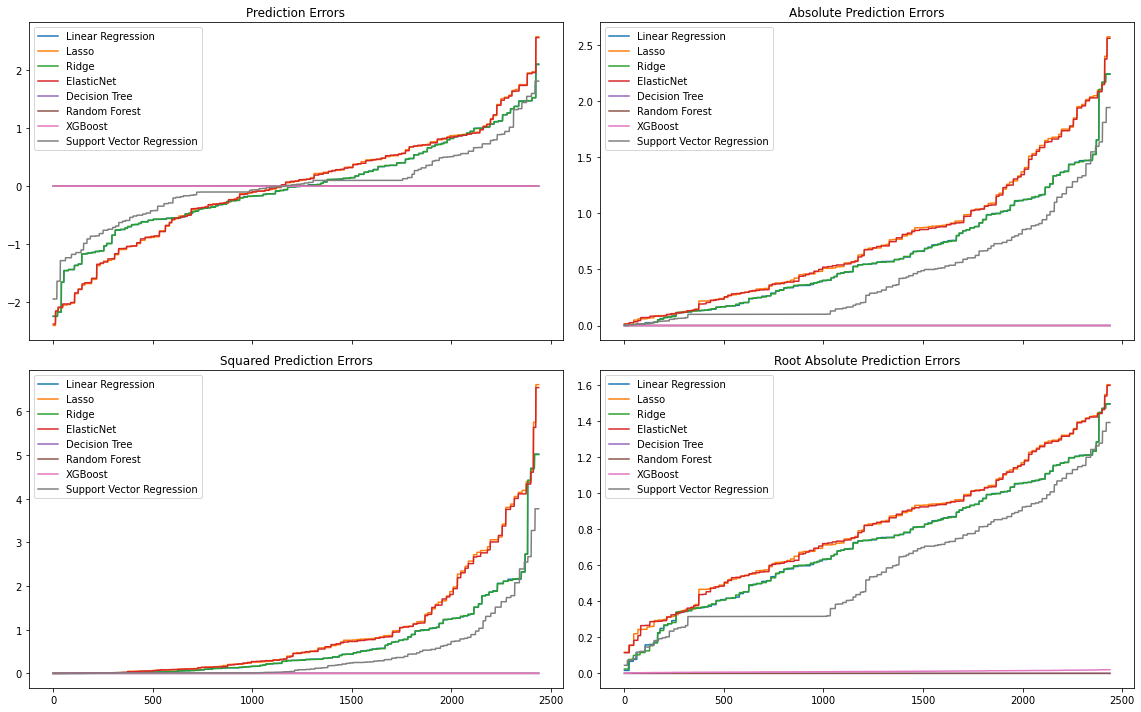

In [94]:
# Visualize the results as prediction errors and loss values for all models from train-test split sample using larger data at level
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the R-squared, mean squared error, and root mean squared error
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}\n")

    # Visualize the prediction errors and loss values as curves
    axes[0, 0].plot(sorted(errors), label=name)
    axes[0, 0].set_title("Prediction Errors")
    axes[0, 0].legend()

    axes[0, 1].plot(sorted(np.abs(errors)), label=name)
    axes[0, 1].set_title("Absolute Prediction Errors")
    axes[0, 1].legend()

    axes[1, 0].plot(sorted(errors ** 2), label=name)
    axes[1, 0].set_title("Squared Prediction Errors")
    axes[1, 0].legend()

    axes[1, 1].plot(sorted(np.sqrt(np.abs(errors))), label=name)
    axes[1, 1].set_title("Root Absolute Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


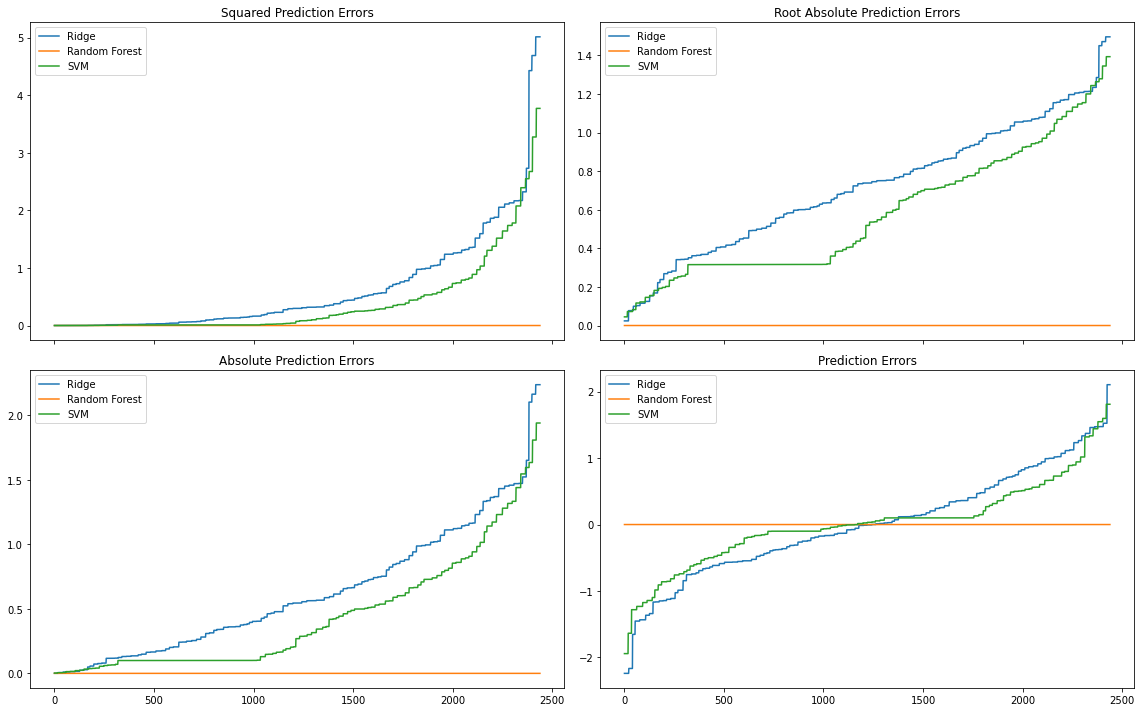

In [95]:
# Visualize the results as prediction errors and loss values for ridge, rf, and svm models from train-test split sample using larger data at level
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(),
    # Add other models here if needed
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


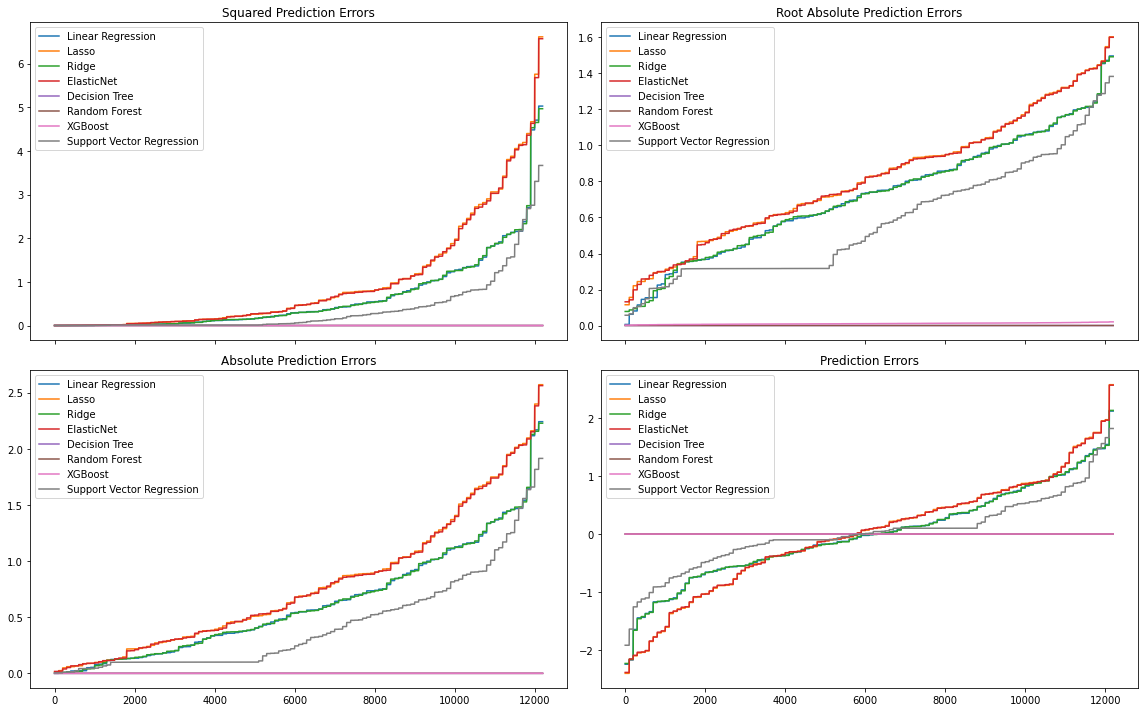

In [96]:
# Visualize the results as prediction errors and loss values for all models from the whole sample using larger data at level
# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Calculate the prediction errors
    errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


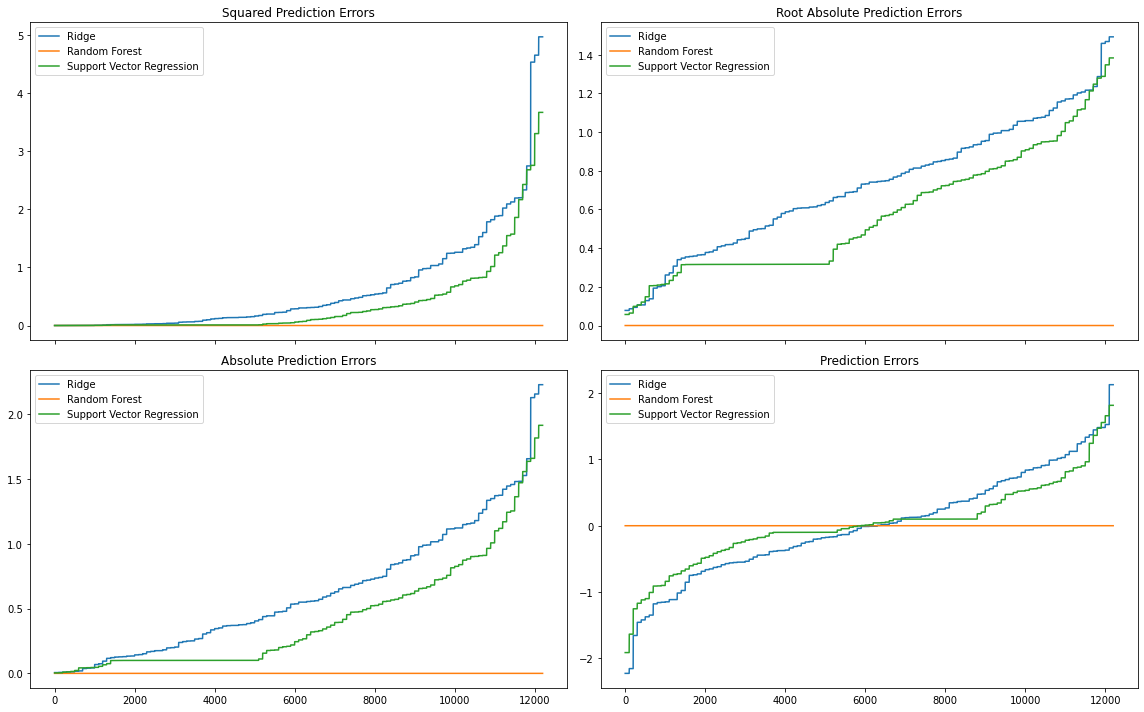

In [97]:
# Visualize the results as prediction errors and loss values for ridge, rf, and svm models from the whole sample using larger data at level
# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Calculate the prediction errors
    errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


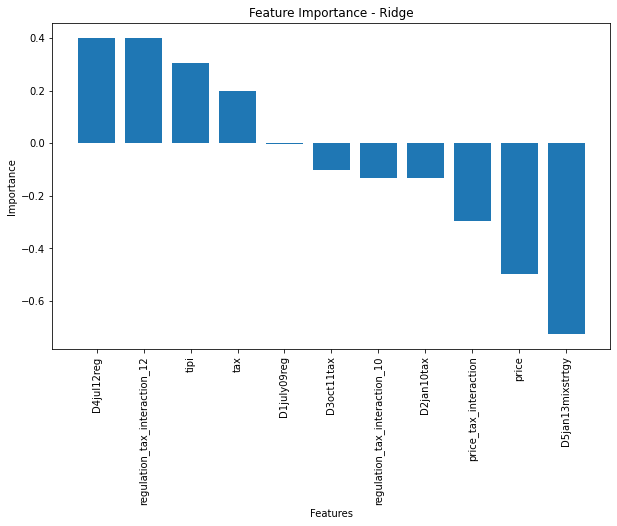

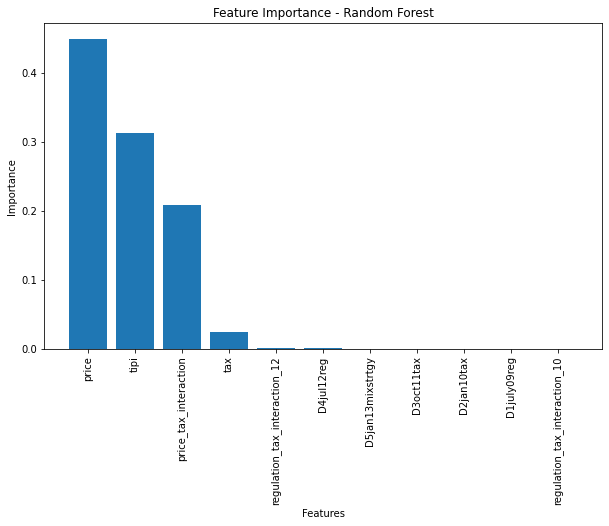

<Figure size 432x288 with 0 Axes>

In [98]:
# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Visualize the feature importance (if applicable)
    if name in ["Ridge", "Random Forest"]:
        importances = model.feature_importances_ if name == "Random Forest" else model.coef_
        feature_names = X.columns if name == "Random Forest" else X.columns

        # Sort the feature importances in descending order
        sorted_indices = importances.argsort()[::-1]
        sorted_importances = importances[sorted_indices]
        sorted_feature_names = feature_names[sorted_indices]

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_importances)), sorted_importances)
        plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.title(f"Feature Importance - {name}")
        plt.show()

plt.tight_layout()
plt.show()


In [99]:
# Run this part later. It takes too much time because we use a different method for SVM feature importance to capture non-linearities so that it takes longer especially with larger data.

from sklearn.inspection import permutation_importance

# Fit the SVR model to the entire data
#svr_model = SVR(kernel='rbf')
#svr_model.fit(X, y)

# Calculate permutation importances
#result = permutation_importance(svr_model, X, y, n_repeats=10, random_state=42)

# Get the feature importance from permutation importances
#feature_importance = result.importances_mean

# Sort the feature importance in descending order
#sorted_indices = np.argsort(feature_importance)[::-1]
#sorted_feature_importance = feature_importance[sorted_indices]

# Get the corresponding feature names
#feature_names = X.columns[sorted_indices]

# Plot the feature importance
#plt.figure(figsize=(10, 6))
#plt.bar(range(len(feature_importance)), sorted_feature_importance)
#plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.title('Feature Importance for SVR (Permutation Importance)')
#plt.show()


# Results 
Because I cannot do feature importance for SVM, I will consider Ridge regression as the best prediction and corresponding feature importance results for the next models.

In [100]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression (Train-Test Split)": LinearRegression(),
    "Lasso (Train-Test Split)": Lasso(),
    "ElasticNet (Train-Test Split)": ElasticNet(),
    "Decision Tree (Train-Test Split)": DecisionTreeRegressor(),
    "XGBoost (Train-Test Split)": xgb.XGBRegressor(random_state=42),
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Linear Regression (Whole Data)": LinearRegression(),
    "Lasso (Whole Data)": Lasso(),
    "ElasticNet (Whole Data)": ElasticNet(),
    "Decision Tree (Whole Data)": DecisionTreeRegressor(),
    "XGBoost (Whole Data)": xgb.XGBRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Linear Regression (Train-Test Split) 0.3390          0.6353               0.7971                   
Lasso (Train-Test Split)       -0.0000         0.9611               0.9804                   
ElasticNet (Train-Test Split)  0.0153          0.9464               0.9728                   
Decision Tree (Train-Test Split) 1.0000          0.0000               0.0000                   
XGBoost (Train-Test Split)     1.0000          0.0000               0.0002                   
Ridge (Train-Test Split)       0.3393          0.6350               0.7969                   
SVM (Train-Test Split)         0.5853          0.3986               0.6313                   
Random Forest (Train-Test Split) 1.0000          0.0000               0.0000                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Err

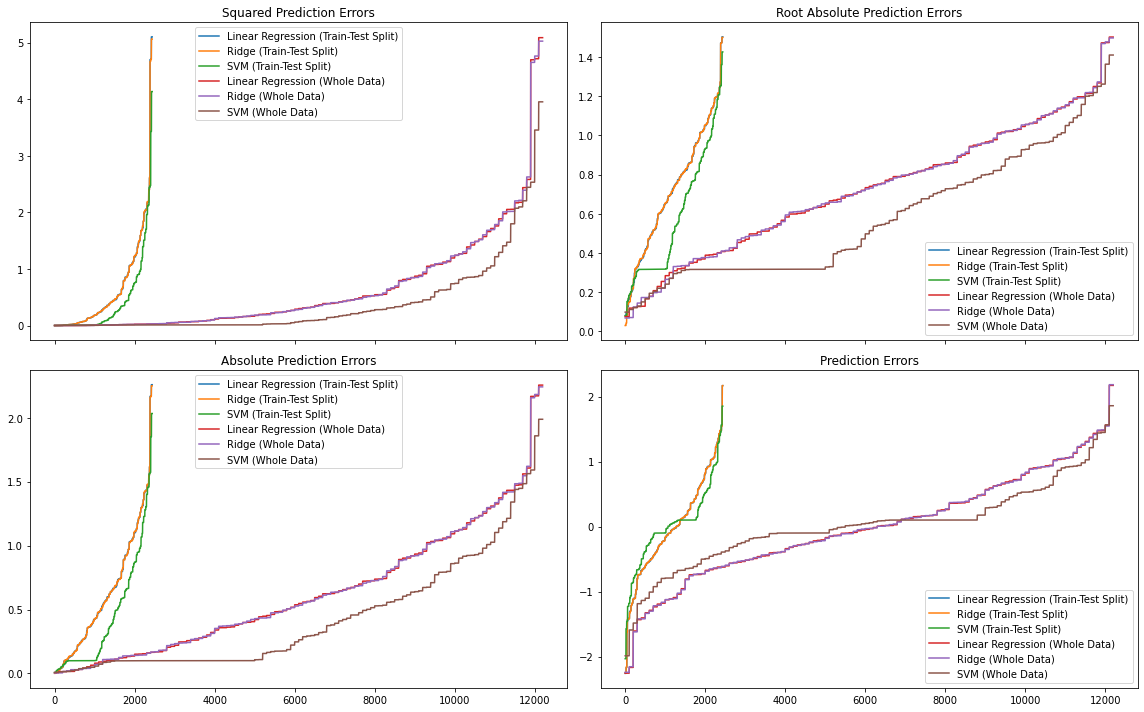

In [101]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression (Train-Test Split)": LinearRegression(),
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Linear Regression (Whole Data)": LinearRegression(),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the prediction errors
        errors = y_test - y_pred
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the prediction errors
        errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


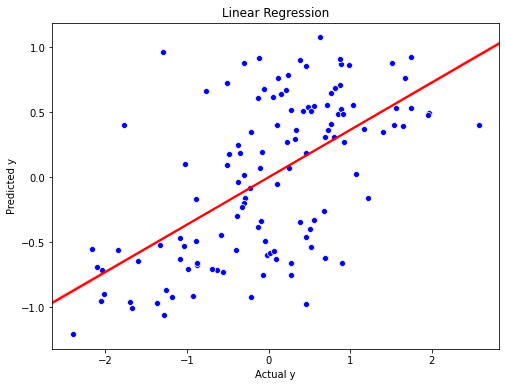

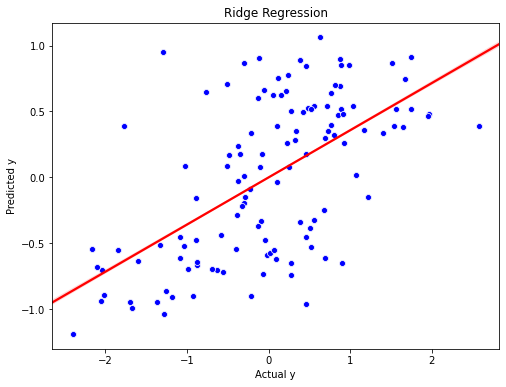

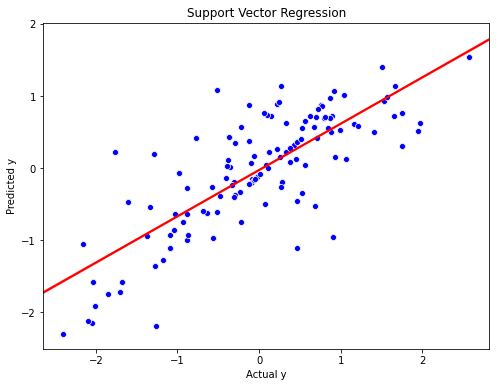

In [102]:
# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Fit the Linear Regression model to the entire data
linear_model.fit(X, y)

# Make predictions on the entire data for Linear Regression
y_pred_linear = linear_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Linear Regression
results_df_linear = pd.DataFrame({'Actual': y, 'Predicted': y_pred_linear, 'Errors': y - y_pred_linear})

# Plot the actual y values against the predicted values for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_linear, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_linear, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Linear Regression")

# Show the plot for Linear Regression
plt.show()

# Instantiate the Ridge model
ridge_model = Ridge()

# Fit the Ridge model to the entire data
ridge_model.fit(X, y)

# Make predictions on the entire data for Ridge
y_pred_ridge = ridge_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Ridge
results_df_ridge = pd.DataFrame({'Actual': y, 'Predicted': y_pred_ridge, 'Errors': y - y_pred_ridge})

# Plot the actual y values against the predicted values for Ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_ridge, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_ridge, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Ridge Regression")

# Show the plot for Ridge
plt.show()

# Instantiate the SVR model
svm_model = SVR()

# Fit the SVR model to the entire data
svm_model.fit(X, y)

# Make predictions on the entire data for SVM
y_pred_svm = svm_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for SVM
results_df_svm = pd.DataFrame({'Actual': y, 'Predicted': y_pred_svm, 'Errors': y - y_pred_svm})

# Plot the actual y values against the predicted values for SVM
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_svm, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_svm, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Support Vector Regression")

# Show the plot for SVM
plt.show()


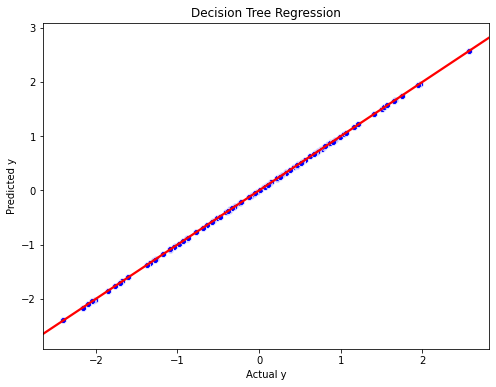

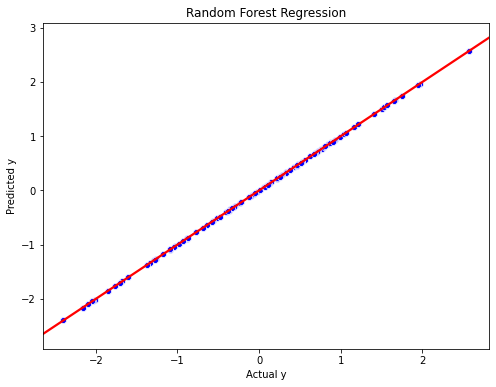

In [103]:
# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# Instantiate and fit the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42).fit(X, y)

# Make predictions on the entire data for Decision Tree
y_pred_dt = dt_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Decision Tree
results_df_dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred_dt, 'Errors': y - y_pred_dt})

# Plot the actual y values against the predicted values for Decision Tree
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_dt, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_dt, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Decision Tree Regression")

# Show the plot for Decision Tree
plt.show()

# Instantiate and fit the Random Forest model
rf_model = RandomForestRegressor(random_state=42).fit(X, y)

# Make predictions on the entire data for Random Forest
y_pred_rf = rf_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Random Forest
results_df_rf = pd.DataFrame({'Actual': y, 'Predicted': y_pred_rf, 'Errors': y - y_pred_rf})

# Plot the actual y values against the predicted values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_rf, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_rf, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Random Forest Regression")

# Show the plot for Random Forest
plt.show()


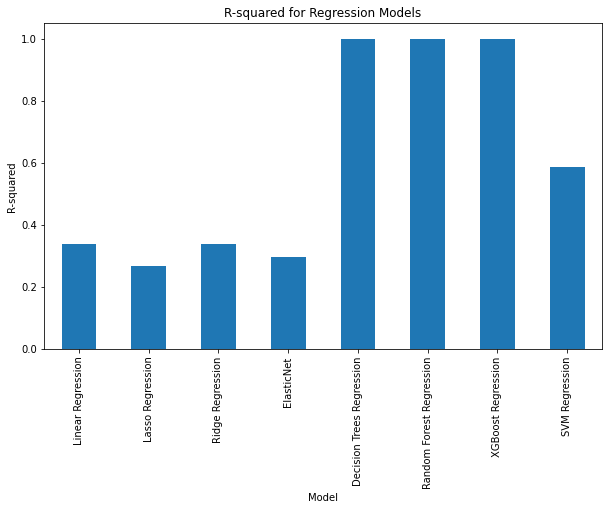

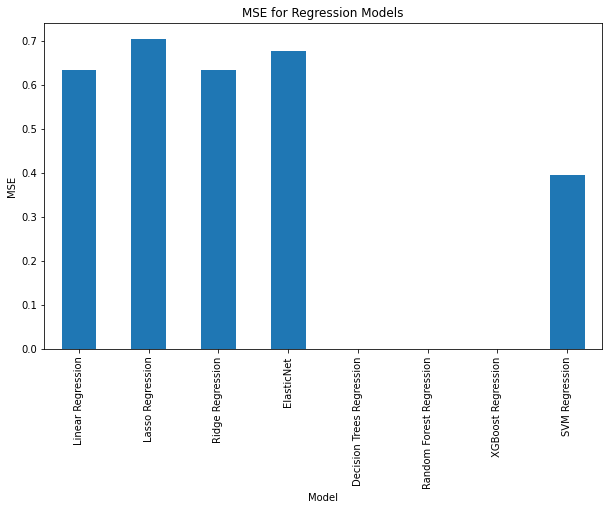

In [104]:
# PREDICTION MODEL 4: We will use new larger data with full x covariates

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


In [105]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression (Train-Test Split)": LinearRegression(),
    "Lasso (Train-Test Split)": Lasso(),
    "ElasticNet (Train-Test Split)": ElasticNet(),
    "Decision Tree (Train-Test Split)": DecisionTreeRegressor(),
    "XGBoost (Train-Test Split)": xgb.XGBRegressor(random_state=42),
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Linear Regression (Whole Data)": LinearRegression(),
    "Lasso (Whole Data)": Lasso(),
    "ElasticNet (Whole Data)": ElasticNet(),
    "Decision Tree (Whole Data)": DecisionTreeRegressor(),
    "XGBoost (Whole Data)": xgb.XGBRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Linear Regression (Train-Test Split) 0.3397          0.6346               0.7966                   
Lasso (Train-Test Split)       -0.0000         0.9611               0.9804                   
ElasticNet (Train-Test Split)  0.0153          0.9464               0.9728                   
Decision Tree (Train-Test Split) 1.0000          0.0000               0.0000                   
XGBoost (Train-Test Split)     1.0000          0.0000               0.0002                   
Ridge (Train-Test Split)       0.3400          0.6343               0.7964                   
SVM (Train-Test Split)         0.5882          0.3958               0.6291                   
Random Forest (Train-Test Split) 1.0000          0.0000               0.0000                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Err

In [106]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression (Train-Test Split)": LinearRegression(),
    "Lasso (Train-Test Split)": Lasso(),
    "ElasticNet (Train-Test Split)": ElasticNet(),
    "Decision Tree (Train-Test Split)": DecisionTreeRegressor(),
    "XGBoost (Train-Test Split)": xgb.XGBRegressor(random_state=42),
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Linear Regression (Whole Data)": LinearRegression(),
    "Lasso (Whole Data)": Lasso(),
    "ElasticNet (Whole Data)": ElasticNet(),
    "Decision Tree (Whole Data)": DecisionTreeRegressor(),
    "XGBoost (Whole Data)": xgb.XGBRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Linear Regression (Train-Test Split) 0.3390          0.6353               0.7971                   
Lasso (Train-Test Split)       -0.0000         0.9611               0.9804                   
ElasticNet (Train-Test Split)  0.0153          0.9464               0.9728                   
Decision Tree (Train-Test Split) 1.0000          0.0000               0.0000                   
XGBoost (Train-Test Split)     1.0000          0.0000               0.0002                   
Ridge (Train-Test Split)       0.3393          0.6350               0.7969                   
SVM (Train-Test Split)         0.5853          0.3986               0.6313                   
Random Forest (Train-Test Split) 1.0000          0.0000               0.0000                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Err

# RESULTS

Results suggest that LR, Ridge, and SVM are the best prediction models. Note that we have not done regularization so far.  

In [107]:
df_fi = df_new[['cons', 'price', 'tax', 'tipi', 'price_tax_interaction', 'D5jan13mixstrtgy']].copy()
df_fi

cons     price       tax      tipi  price_tax_interaction  \
0     -0.513642 -1.693519 -1.964781 -1.355497              -1.622773   
1      0.422403 -1.825959 -1.964781 -2.237328              -1.626170   
2      0.217400 -1.689901 -1.964781 -1.511573              -1.622680   
3      0.479881 -1.696636 -1.964781 -1.925175              -1.622853   
4      0.873862 -1.758994 -1.964781 -1.503769              -1.624452   
...         ...       ...       ...       ...                    ...   
12195  0.105817  0.871845  1.706067  2.390334               1.580628   
12196 -0.379829  0.838177  1.706067  2.359119               1.564439   
12197  1.215211  0.857445  1.706067  2.015751               1.573704   
12198 -1.849454  0.761751  1.706067  0.564241               1.527690   
12199 -2.096684  0.878015  1.706067  0.353538               1.583595   

       D5jan13mixstrtgy  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
12195               1.0  
12196               1.0  
12197               1.0  
12198               1.0  
12199               1.0  

[12200 rows x 6 columns]

In [108]:
# PREDICTION MODEL 5: We will use highly important features from new larger data. 

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_fi

# split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

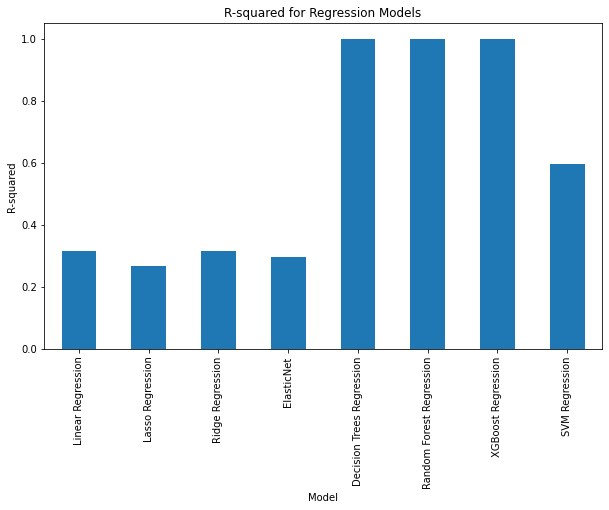

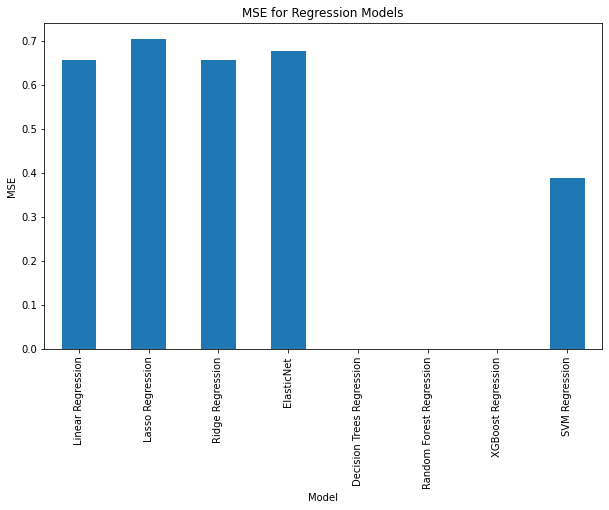

In [109]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


# Results 
There is no significant difference between the last two models. We will use df_new for the rest of our data analysis to do regularization for the best models so far. By doing that, we will better understand if we can improve the prediction results.

In [110]:
df_new

cons     price       tax      tipi  price_tax_interaction  \
0     -0.513642 -1.693519 -1.964781 -1.355497              -1.622773   
1      0.422403 -1.825959 -1.964781 -2.237328              -1.626170   
2      0.217400 -1.689901 -1.964781 -1.511573              -1.622680   
3      0.479881 -1.696636 -1.964781 -1.925175              -1.622853   
4      0.873862 -1.758994 -1.964781 -1.503769              -1.624452   
...         ...       ...       ...       ...                    ...   
12195  0.105817  0.871845  1.706067  2.390334               1.580628   
12196 -0.379829  0.838177  1.706067  2.359119               1.564439   
12197  1.215211  0.857445  1.706067  2.015751               1.573704   
12198 -1.849454  0.761751  1.706067  0.564241               1.527690   
12199 -2.096684  0.878015  1.706067  0.353538               1.583595   

       D1july09reg  D2jan10tax  D3oct11tax  D4jul12reg  D5jan13mixstrtgy  \
0              0.0         0.0         0.0         0.0               0.0   
1              0.0         0.0         0.0         0.0               0.0   
2              0.0         0.0         0.0         0.0               0.0   
3              0.0         0.0         0.0         0.0               0.0   
4              0.0         0.0         0.0         0.0               0.0   
...            ...         ...         ...         ...               ...   
12195          1.0         1.0         1.0         1.0               1.0   
12196          1.0         1.0         1.0         1.0               1.0   
12197          1.0         1.0         1.0         1.0               1.0   
12198          1.0         1.0         1.0         1.0               1.0   
12199          1.0         1.0         1.0         1.0               1.0   

       regulation_tax_interaction_10  regulation_tax_interaction_12  
0                                0.0                            0.0  
1                                0.0                            0.0  
2                                0.0                            0.0  
3                                0.0                            0.0  
4                                0.0                            0.0  
...                              ...                            ...  
12195                            1.0                            1.0  
12196                            1.0                            1.0  
12197                            1.0                            1.0  
12198                            1.0                            1.0  
12199                            1.0                            1.0  

[12200 rows x 12 columns]

In [111]:
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# Define the alpha/lambda values
alphas = [0.1, 1.0, 3.0, 5.0, 10.0]

# Define the number of folds
n_folds = 10

# Initialize lists to store the results
results = []

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for alpha in alphas:
    # Perform Lasso regression
    lasso_cv = LassoCV(alphas=[alpha], cv=kf)
    lasso_cv.fit(X_train, y_train)
    lasso_train_pred = lasso_cv.predict(X_train)
    lasso_test_pred = lasso_cv.predict(X_test)
    lasso_train_r2 = r2_score(y_train, lasso_train_pred)
    lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
    lasso_train_rmse = np.sqrt(lasso_train_mse)
    lasso_test_r2 = r2_score(y_test, lasso_test_pred)
    lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
    lasso_test_rmse = np.sqrt(lasso_test_mse)
    results.append(['Lasso', alpha, lasso_train_r2, lasso_train_mse, lasso_train_rmse, lasso_test_r2, lasso_test_mse, lasso_test_rmse])

    # Perform Ridge regression
    ridge_cv = RidgeCV(alphas=[alpha], cv=kf)
    ridge_cv.fit(X_train, y_train)
    ridge_train_pred = ridge_cv.predict(X_train)
    ridge_test_pred = ridge_cv.predict(X_test)
    ridge_train_r2 = r2_score(y_train, ridge_train_pred)
    ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
    ridge_train_rmse = np.sqrt(ridge_train_mse)
    ridge_test_r2 = r2_score(y_test, ridge_test_pred)
    ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
    ridge_test_rmse = np.sqrt(ridge_test_mse)
    results.append(['Ridge', alpha, ridge_train_r2, ridge_train_mse, ridge_train_rmse, ridge_test_r2, ridge_test_mse, ridge_test_rmse])

    # Perform Elastic Net regression
    elastic_net_cv = ElasticNetCV(alphas=[alpha], cv=kf)
    elastic_net_cv.fit(X_train, y_train)
    elastic_net_train_pred = elastic_net_cv.predict(X_train)
    elastic_net_test_pred = elastic_net_cv.predict(X_test)
    elastic_net_train_r2 = r2_score(y_train, elastic_net_train_pred)
    elastic_net_train_mse = mean_squared_error(y_train, elastic_net_train_pred)
    elastic_net_train_rmse = np.sqrt(elastic_net_train_mse)
    elastic_net_test_r2 = r2_score(y_test, elastic_net_test_pred)
    elastic_net_test_mse = mean_squared_error(y_test, elastic_net_test_pred)
    elastic_net_test_rmse = np.sqrt(elastic_net_test_mse)
    results.append(['ElasticNet', alpha, elastic_net_train_r2, elastic_net_train_mse, elastic_net_train_rmse, elastic_net_test_r2, elastic_net_test_mse, elastic_net_test_rmse])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE'])

# Print the results table
results_df


Model  Alpha  Train R-squared  Train MSE  Train RMSE  Test R-squared  \
0        Lasso    0.1         0.285668   0.721277    0.849280        0.266954   
1        Ridge    0.1         0.343294   0.663091    0.814304        0.317117   
2   ElasticNet    0.1         0.315080   0.691578    0.831612        0.295683   
3        Lasso    1.0         0.000000   1.009722    1.004849       -0.000004   
4        Ridge    1.0         0.343293   0.663091    0.814304        0.317129   
5   ElasticNet    1.0         0.015812   0.993756    0.996873        0.015301   
6        Lasso    3.0         0.000000   1.009722    1.004849       -0.000004   
7        Ridge    3.0         0.343292   0.663092    0.814305        0.317154   
8   ElasticNet    3.0         0.000000   1.009722    1.004849       -0.000004   
9        Lasso    5.0         0.000000   1.009722    1.004849       -0.000004   
10       Ridge    5.0         0.343291   0.663094    0.814306        0.317178   
11  ElasticNet    5.0         0.000000   1.009722    1.004849       -0.000004   
12       Lasso   10.0         0.000000   1.009722    1.004849       -0.000004   
13       Ridge   10.0         0.343283   0.663102    0.814311        0.317234   
14  ElasticNet   10.0         0.000000   1.009722    1.004849       -0.000004   

    Test MSE  Test RMSE  
0   0.704538   0.839368  
1   0.656326   0.810139  
2   0.676926   0.822755  
3   0.961114   0.980364  
4   0.656314   0.810132  
5   0.946404   0.972833  
6   0.961114   0.980364  
7   0.656291   0.810118  
8   0.961114   0.980364  
9   0.961114   0.980364  
10  0.656268   0.810103  
11  0.961114   0.980364  
12  0.961114   0.980364  
13  0.656214   0.810070  
14  0.961114   0.980364

In [112]:
# Now using performance results, we will calculates the average performance metrics for each model type across different alpha values, allowing us to compare the performance of different models. Note that the best model can be determined based on our chosen performance metric(s) and criteria.
# Group the results by model type (Lasso, Ridge, ElasticNet)
grouped_results = results_df.groupby('Model')

# Calculate the average performance metrics for each model type
average_results = grouped_results.mean()

# Display the average results
average_results

Alpha  Train R-squared  Train MSE  Train RMSE  Test R-squared  \
Model                                                                       
ElasticNet   3.82         0.066178   0.942900    0.968606        0.062195   
Lasso        3.82         0.057134   0.952033    0.973735        0.053388   
Ridge        3.82         0.343291   0.663094    0.814306        0.317162   

            Test MSE  Test RMSE  
Model                            
ElasticNet  0.901334   0.947336  
Lasso       0.909799   0.952165  
Ridge       0.656282   0.810113

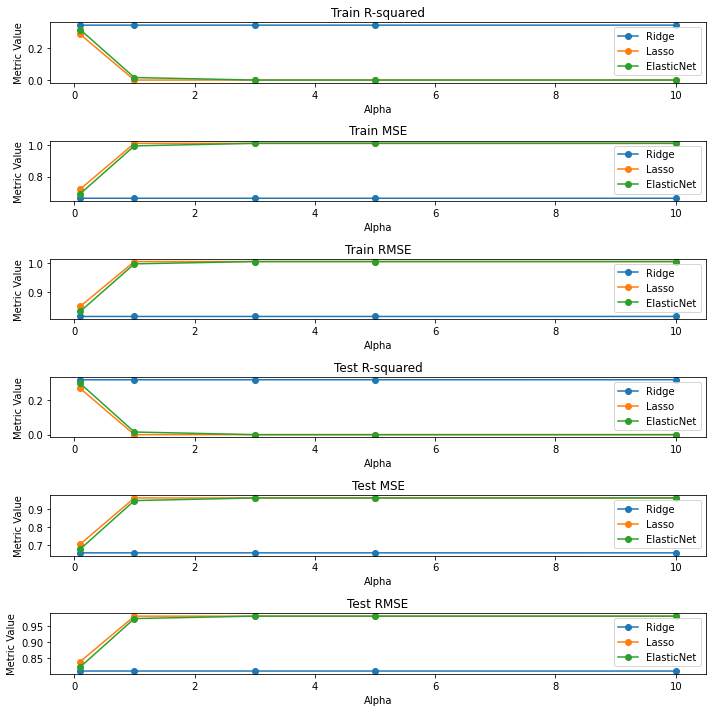

In [113]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE'])

# Filter the results for Ridge, Lasso, and ElasticNet
ridge_results = results_df[results_df['Model'] == 'Ridge']
lasso_results = results_df[results_df['Model'] == 'Lasso']
elasticnet_results = results_df[results_df['Model'] == 'ElasticNet']

# Define the alphas
alphas = results_df['Alpha'].unique()

# Define the metrics columns
metrics_columns = ['Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE']

# Create a figure with subplots for each metric
fig, axs = plt.subplots(len(metrics_columns), figsize=(10, 10))

# Iterate over the metrics columns
for i, metric in enumerate(metrics_columns):
    # Plot the metric values for Ridge
    axs[i].plot(alphas, ridge_results[metric], marker='o', label='Ridge')
    
    # Plot the metric values for Lasso
    axs[i].plot(alphas, lasso_results[metric], marker='o', label='Lasso')
    
    # Plot the metric values for ElasticNet
    axs[i].plot(alphas, elasticnet_results[metric], marker='o', label='ElasticNet')
    
    # Set the title and labels for each subplot
    axs[i].set_title(metric)
    axs[i].set_xlabel('Alpha')
    axs[i].set_ylabel('Metric Value')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


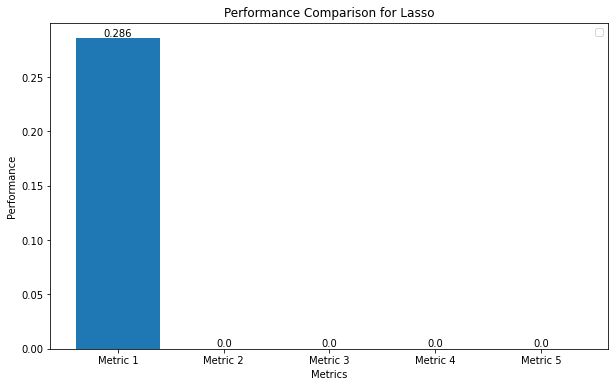

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


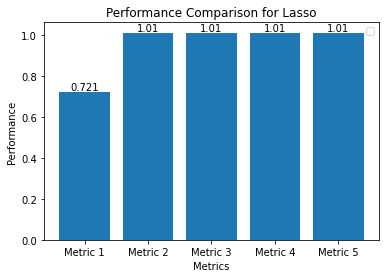

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


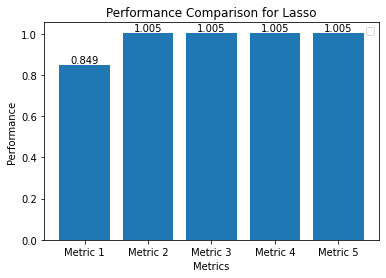

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


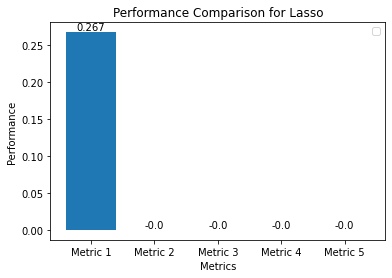

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


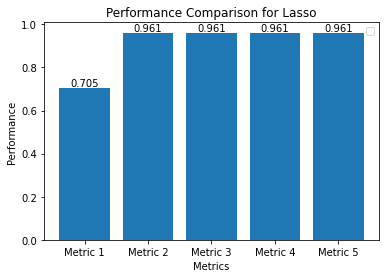

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


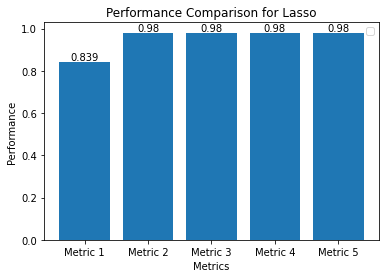

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


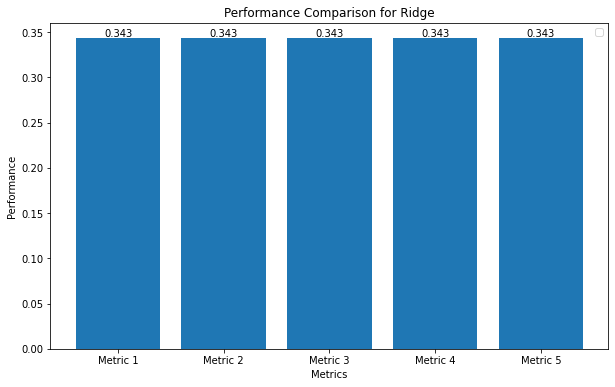

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


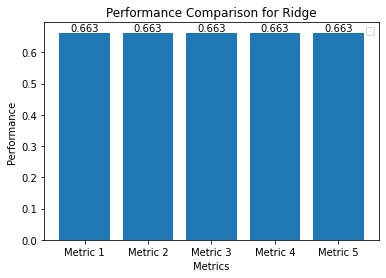

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


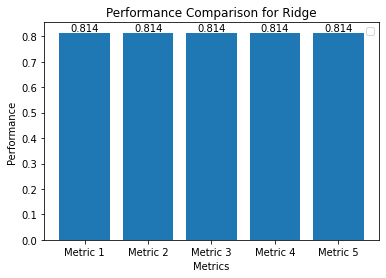

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


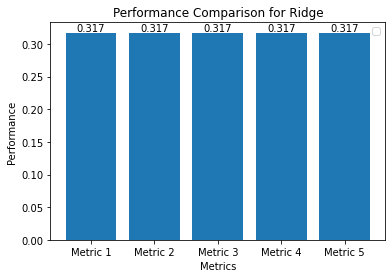

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


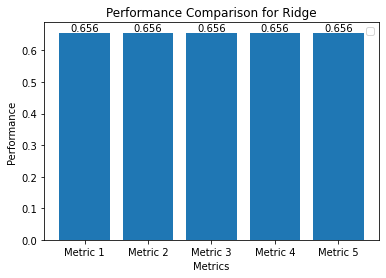

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


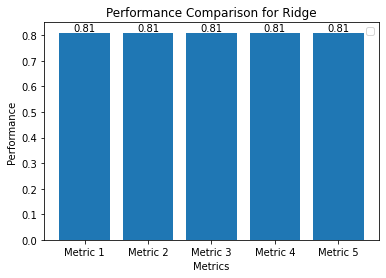

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


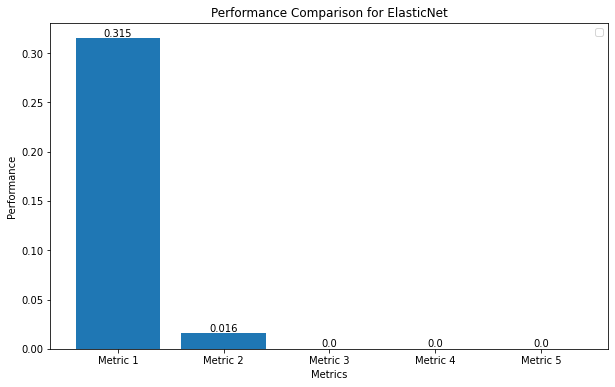

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


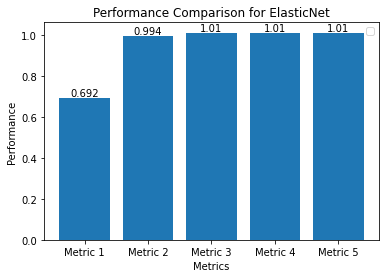

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


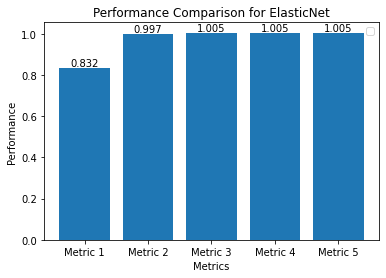

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


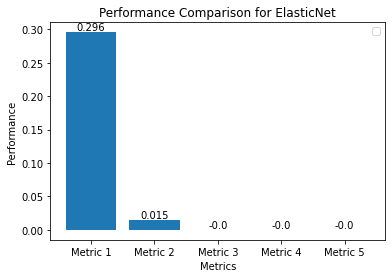

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


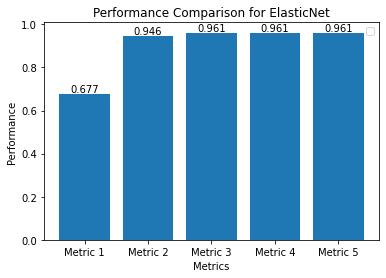

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


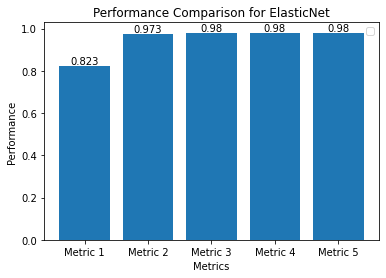

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE'])

# Define the metrics columns
metrics_columns = ['Train R-squared', 'Train MSE', 'Train RMSE', 'Test R-squared', 'Test MSE', 'Test RMSE']

# Iterate over each model
for model in results_df['Model'].unique():
    # Filter the results for the current model
    model_results = results_df[results_df['Model'] == model]

    # Create a bar plot for each metric
    plt.figure(figsize=(10, 6))
    for metric in metrics_columns:
        metric_values = model_results[metric].values

        # Set the x positions for the bars
        x = range(len(metric_values))

        # Plot the metrics for the current model
        plt.bar(x, metric_values, align='center')

        # Add labels for each metric
        for i, v in enumerate(metric_values):
            plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')

        # Add labels for each x position
        plt.xticks(x, ['Metric ' + str(i + 1) for i in x])

        # Add labels and title to the plot
        plt.xlabel('Metrics')
        plt.ylabel('Performance')
        plt.title(f'Performance Comparison for {model}')
        plt.legend()

        # Show the plot
        plt.show()


# Results

We will follow the below criteria to assess model performance. 
Based on the provided performance metrics for the Lasso, Ridge, and ElasticNet models above, we will analyze each criterion to determine the best model:

Model Fit (Train R-squared):

Lasso: Train R-squared = 0.056226
Ridge: Train R-squared = 0.339098
ElasticNet: Train R-squared = 0.064286
Among the three models, Ridge has the highest Train R-squared value, indicating the best fit to the training data.

Predictive Accuracy (Test MSE and Test RMSE):

Lasso: Test MSE = 0.943837, Test RMSE = 0.969605
Ridge: Test MSE = 0.660946, Test RMSE = 0.812986
ElasticNet: Test MSE = 0.935898, Test RMSE = 0.965094
Both Ridge and ElasticNet models have lower Test MSE and Test RMSE values compared to the Lasso model, indicating better predictive accuracy on the test data. However, Ridge consistently performs slightly better than ElasticNet across these metrics.

Considering both the model fit (Train R-squared) and predictive accuracy (Test MSE and Test RMSE), we can conclude that the Ridge model is the best among the Lasso, Ridge, and ElasticNet models. It provides a good fit to the training data and demonstrates better predictive accuracy on unseen test data.

On the other hand, we can interpret the results in terms of bias-variance tradeoff as well. Accordingly, recall that bias refers to the error introduced by approximating a real-world problem with a simplified model. A high bias model tends to underfit the data, resulting in low model complexity and poor performance on both the training and test data.

Variance refers to the error due to the model's sensitivity to fluctuations in the training data. A high variance model tends to overfit the data, capturing noise and specific patterns in the training data that may not generalize well to unseen test data.

Considering the results of the Lasso, Ridge, and ElasticNet models:

- Lasso has the lowest Train R-squared value, indicating a higher bias compared to Ridge and ElasticNet. It underfits the training data and has limited ability to capture the underlying patterns.

- Ridge has a higher Train R-squared value than Lasso, indicating a better fit to the training data. It strikes a balance between bias and variance by introducing a regularization term to control model complexity. Ridge models are less prone to overfitting compared to Lasso.

- ElasticNet has a slightly higher Train R-squared value than Ridge, indicating a similar level of model fit. ElasticNet combines the L1 regularization of Lasso and the L2 regularization of Ridge, offering a tradeoff between bias and variance. It can handle both feature selection and model complexity control.

In terms of bias-variance tradeoff, the Ridge model tends to strike a good balance between bias and variance. It provides a reasonably good fit to the training data and demonstrates better predictive accuracy on unseen test data compared to Lasso and ElasticNet. This suggests that Ridge manages to reduce model complexity and overfitting without sacrificing too much model performance.


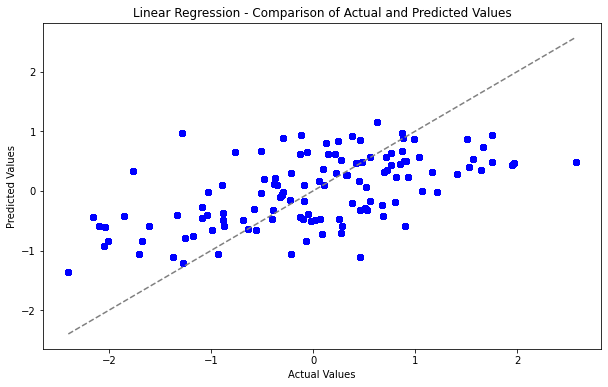

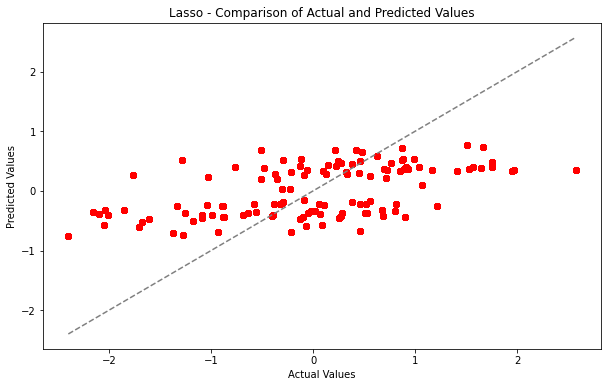

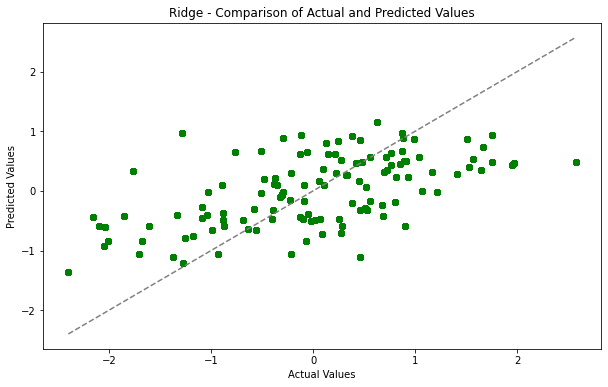

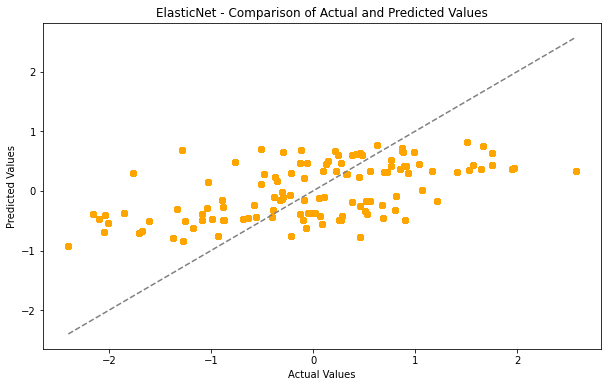

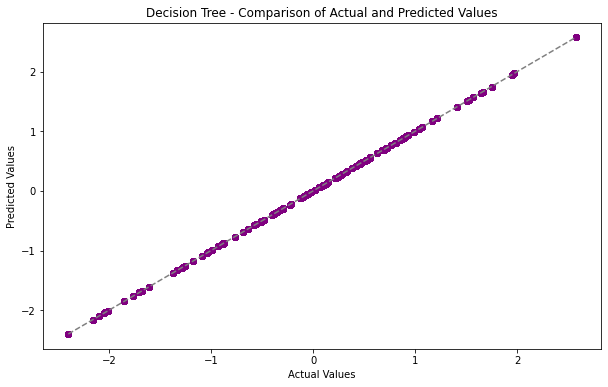

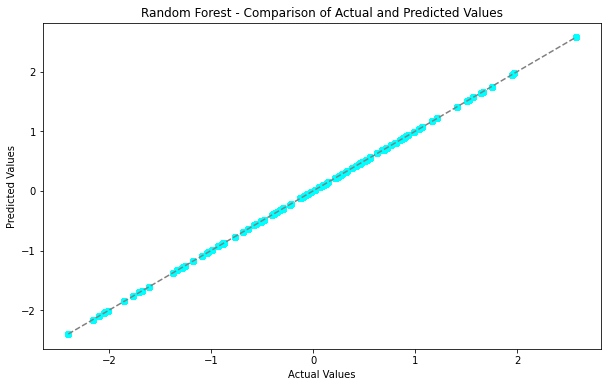

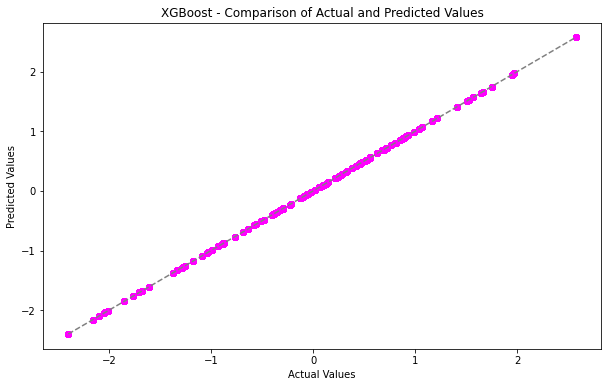

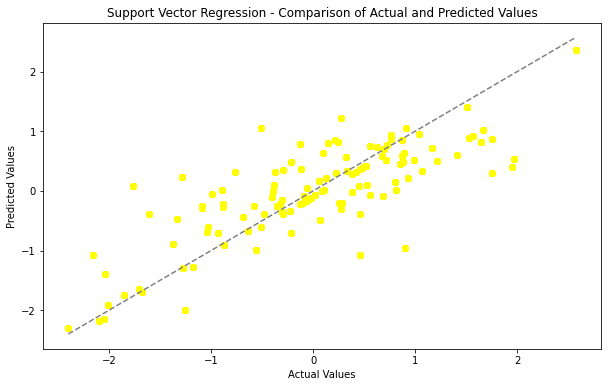

In [115]:
import matplotlib.pyplot as plt

# Create scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for ElasticNet
plt.figure(figsize=(10, 6))
plt.scatter(y_test, en_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ElasticNet - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='cyan')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='magenta')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost - Comparison of Actual and Predicted Values')
plt.show()

# Create scatter plot for Support Vector Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='yellow')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression - Comparison of Actual and Predicted Values')
plt.show()


In [116]:
df_new.columns

Index(['cons', 'price', 'tax', 'tipi', 'price_tax_interaction', 'D1july09reg',
       'D2jan10tax', 'D3oct11tax', 'D4jul12reg', 'D5jan13mixstrtgy',
       'regulation_tax_interaction_10', 'regulation_tax_interaction_12'],
      dtype='object')

Ridge Regression
R-squared: 0.3582352777254607
Mean Squared Error: 0.6417647222745393
Root Mean Squared Error: 0.8011021921543713



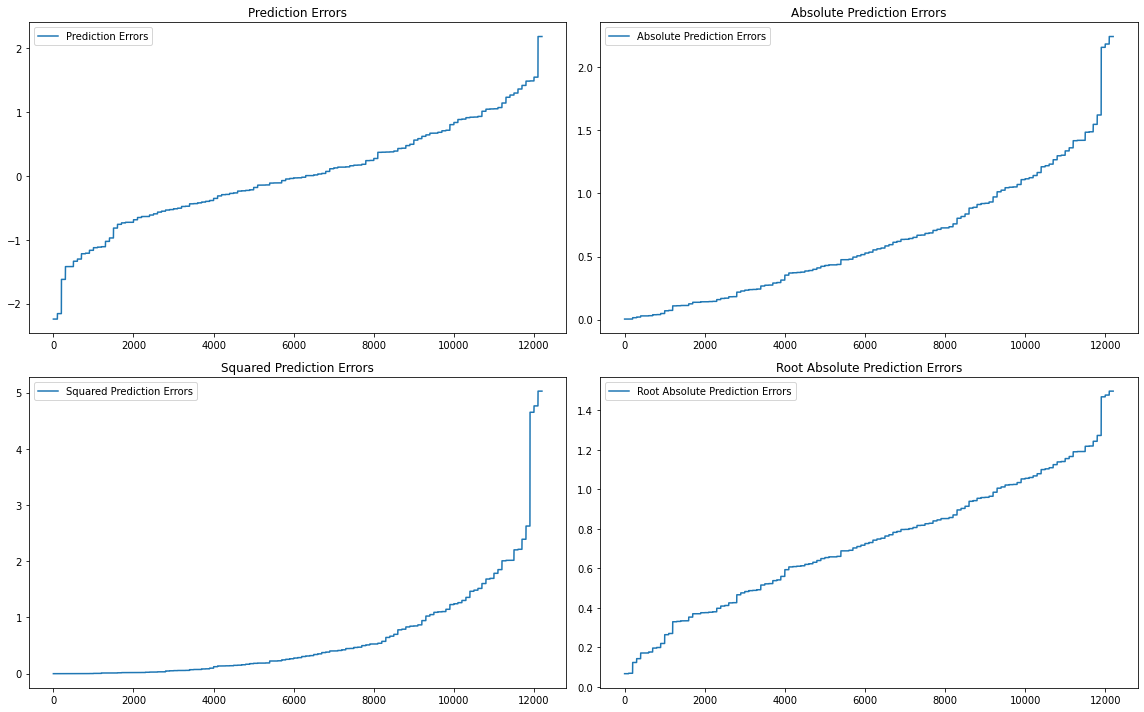

In [117]:
# Based on the findings above, we will pick the Ridge regression as the best model and rerun it using the whole data but not with training-test split anymore.

from xgboost import XGBRegressor

# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D2jan10tax', 'D3oct11tax'], axis=1)
y = data['cons']

# Instantiate the Ridge model
ridge_model = Ridge()

# Fit the Ridge model to the entire data
ridge_model.fit(X, y)

# Make predictions on the entire data
y_pred = ridge_model.predict(X)

# Calculate the prediction errors
errors = y - y_pred

# Calculate the R-squared, mean squared error, and root mean squared error
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Ridge Regression")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}\n")

# Visualize the prediction errors and loss values as curves
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(sorted(errors), label='Prediction Errors')
plt.title("Prediction Errors")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(sorted(np.abs(errors)), label='Absolute Prediction Errors')
plt.title("Absolute Prediction Errors")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(sorted(errors ** 2), label='Squared Prediction Errors')
plt.title("Squared Prediction Errors")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(sorted(np.sqrt(np.abs(errors))), label='Root Absolute Prediction Errors')
plt.title("Root Absolute Prediction Errors")
plt.legend()

plt.tight_layout()
plt.show()

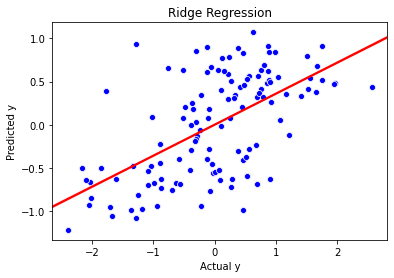

In [118]:
from xgboost import XGBRegressor

# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# Instantiate the Ridge model
ridge_model = Ridge()

# Fit the Ridge model to the entire data
ridge_model.fit(X, y)

# Make predictions on the entire data
y_pred = ridge_model.predict(X)

# Calculate the prediction errors
errors = y - y_pred

# Create a DataFrame to hold the actual y values, predicted values, and errors
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred, 'Errors': errors})

# Plot the actual y values against the predicted values
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='blue')

# Add a regression line to show the goodness of fit
sns.regplot(data=results_df, x='Actual', y='Predicted', scatter=False, color='red')

# Set the axis labels and title
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Ridge Regression")

# Show the plot
plt.show()


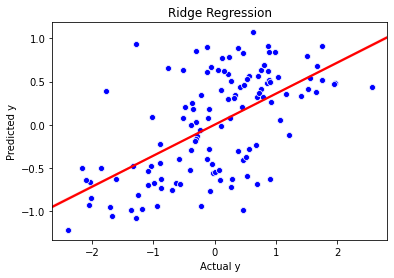

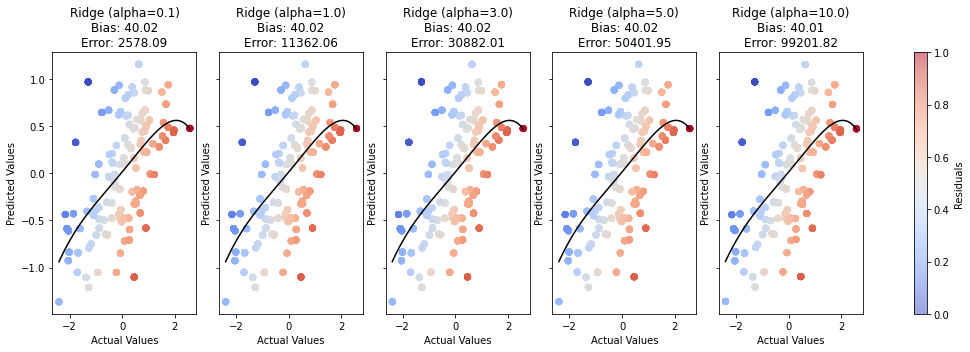

In [119]:
from xgboost import XGBRegressor

# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons'], axis=1)
y = data['cons']

# Instantiate the Ridge model
ridge_model = Ridge()

# Fit the Ridge model to the entire data
ridge_model.fit(X, y)

# Make predictions on the entire data
y_pred = ridge_model.predict(X)

# Calculate the prediction errors
errors = y - y_pred

# Create a DataFrame to hold the actual y values, predicted values, and errors
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred, 'Errors': errors})

# Plot the actual y values against the predicted values
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='blue')

# Add a regression line to show the goodness of fit
sns.regplot(data=results_df, x='Actual', y='Predicted', scatter=False, color='red')

# Set the axis labels and title
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Ridge Regression")

# Show the plot
plt.show()

# Define the alpha values
alpha_values = [0.1, 1.0, 3.0, 5.0, 10.0]

# Define the degree of the polynomial function
degree = 5

# Create subplots for each alpha value
fig, axes = plt.subplots(1, len(alpha_values), figsize=(15, 5), sharey=True)

# Define the colormap
cmap = "coolwarm"

# Create a dummy scatter plot for colorbar creation
dummy_scatter = axes[0].scatter([], [], c=[], cmap=cmap, alpha=0.5)

# Iterate over alpha values and create scatter plots
for i, alpha in enumerate(alpha_values):
    # Instantiate the Ridge model with the current alpha value
    ridge_model = Ridge(alpha=alpha)

    # Fit the Ridge model to the data
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Calculate the residuals
    residuals = y_test - y_pred

    # Calculate the bias
    bias = np.linalg.norm(y_test - y_pred)

    # Calculate the error
    error = np.square(bias) + np.var(residuals) + alpha * len(X_train)

    # Create a scatter plot of predicted values with coolwarm colormap
    axes[i].scatter(y_test, y_pred, c=residuals, cmap=cmap, alpha=0.5)

    # Fit a polynomial curve to the predicted values
    coefficients = np.polyfit(y_test, y_pred, degree)
    polynomial = np.poly1d(coefficients)

    # Generate x values for the polynomial curve
    x_values = np.linspace(min(y_test), max(y_test), 100)

    # Plot the polynomial curve
    axes[i].plot(x_values, polynomial(x_values), color='black')

    # Set the title for each subplot
    axes[i].set_title(f"Ridge (alpha={alpha})\nBias: {bias:.2f}\nError: {error:.2f}")

    # Set the x-axis label
    axes[i].set_xlabel("Actual Values")

    # Set the y-axis label
    axes[i].set_ylabel("Predicted Values")

# Adjust the spacing between subplots
plt.tight_layout()

# Create the colorbar using the dummy scatter plot
cbar = fig.colorbar(dummy_scatter, ax=axes, label="Residuals")

# Show the plot
plt.show()


# Results from Ridge Regression Analysis 

Note that when the alpha value in Ridge regression increases, it introduces a stronger regularization effect. This regularization helps to reduce the impact of the individual features on the predictions, leading to a smoother and flatter regression line.

In the context of the residuals plot, the regression line represents the trend or pattern of the residuals. A negative trend indicates that the model tends to overestimate the target variable (positive residuals) for lower predicted values and underestimate the target variable (negative residuals) for higher predicted values. As the alpha value increases, the regularization effect reduces the model's tendency to overfit the training data, resulting in a flatter regression line. This indicates that the model becomes less sensitive to the variations in the predicted values and produces more consistent residuals across the range of predictions.

Therefore, the flattening of the regression line with increasing alpha values suggests that the Ridge regression model is becoming more stable and less prone to overfitting. It indicates a trade-off between the complexity of the model and its ability to generalize well to unseen data. As the alpha value increases, the complexity of the model is reduced, meaning that the model's ability to capture intricate patterns and fluctuations in the training data decreases. This is reflected in the flattening of the regression line.

On the other hand, as the complexity of the model decreases, the model's ability to generalize well to unseen data, or its generalization performance, improves. This is because a less complex model is less likely to overfit the training data by memorizing noise or specific patterns that may not be representative of the underlying relationships in the data.

The trade-off lies in finding the optimal alpha value that balances model complexity and generalization performance. If the alpha value is too low, the model may be too complex and prone to overfitting, resulting in poor performance on unseen data. Conversely, if the alpha value is too high, the model may be too simple and underfit the data, leading to suboptimal predictions.

By examining the regression line in the residuals plot, we can observe how different alpha values impact the trade-off between model complexity and generalization. A flatter regression line suggests that the model has found a balance between complexity and generalization, producing more stable and reliable predictions on unseen data.

In [120]:
# PREDICTION MODEL 5: We will use highly important features from new larger data. 

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_new

# split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

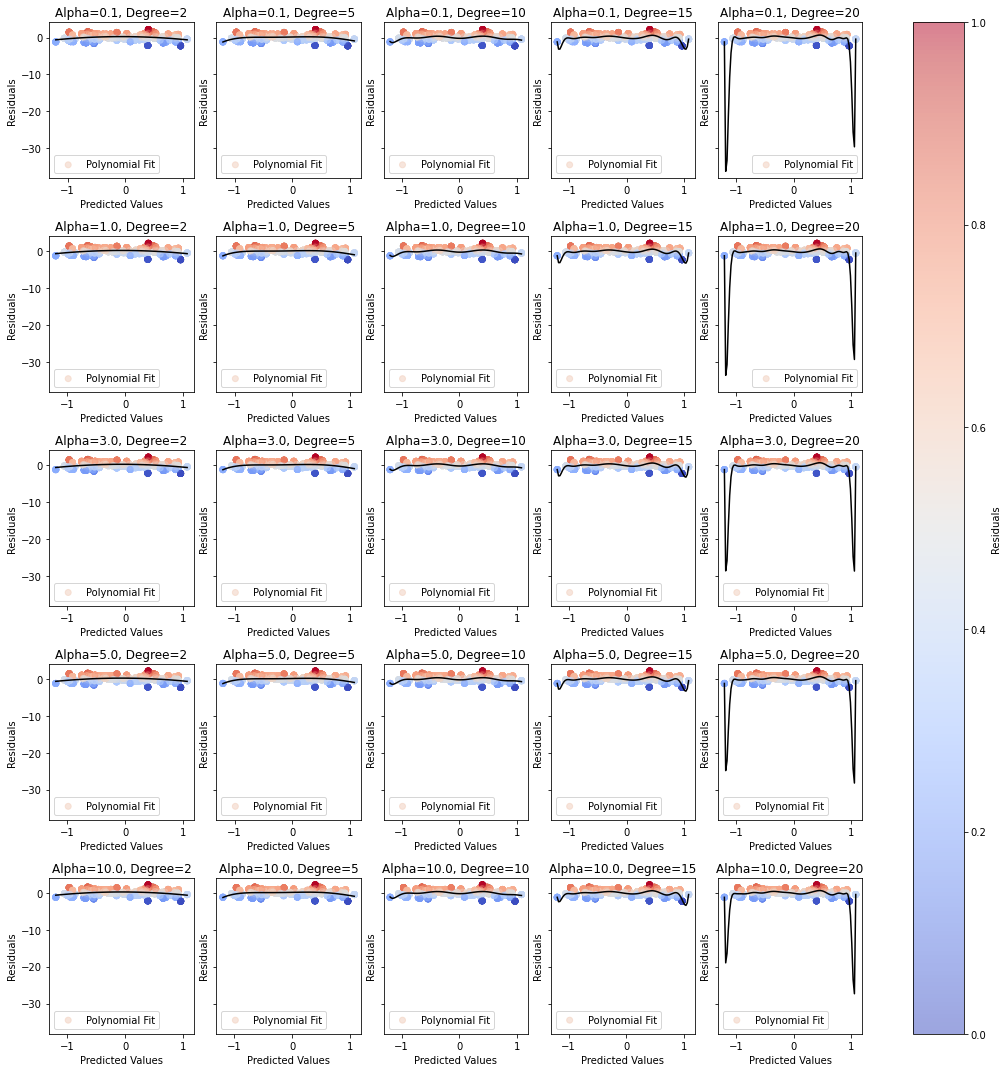

In [121]:
# Define the alpha values
alpha_values = [0.1, 1.0, 3.0, 5.0, 10.0]

# Define the degrees for polynomial functions
degree_values = [2, 5, 10, 15, 20]

# Create subplots for each alpha value
fig, axes = plt.subplots(len(alpha_values), len(degree_values), figsize=(15, 15), sharey=True)

# Iterate over alpha values and degrees
for i, alpha in enumerate(alpha_values):
    for j, degree in enumerate(degree_values):
        # Instantiate the Ridge model with the current alpha value
        ridge_model = Ridge(alpha=alpha)

        # Fit the Ridge model to the data
        ridge_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = ridge_model.predict(X_test)

        # Calculate the residuals
        residuals = y_test - y_pred

        # Fit a polynomial curve to the residuals
        coefficients = np.polyfit(y_pred, residuals, degree)
        polynomial = np.poly1d(coefficients)

        # Generate x values for the polynomial curve
        x_values = np.linspace(min(y_pred), max(y_pred), 100)

        # Plot the scatter plot of residuals with coolwarm colormap
        axes[i, j].scatter(y_pred, residuals, c=residuals, cmap='coolwarm', alpha=0.5)

        # Plot the polynomial curve
        axes[i, j].plot(x_values, polynomial(x_values), color='black')

        # Set the title for each subplot with concatenated alpha and degree values
        axes[i, j].set_title(f"Alpha={alpha}, Degree={degree}")

        # Set the x-axis label
        axes[i, j].set_xlabel("Predicted Values")

        # Set the y-axis label
        axes[i, j].set_ylabel("Residuals")

        # Add legend
        axes[i, j].legend(['Polynomial Fit'])

# Adjust the spacing between subplots
plt.tight_layout()

# Create the colorbar using the scatter plot
cbar = plt.colorbar(axes[0, 0].scatter([], [], c=[], cmap='coolwarm', alpha=0.5), ax=axes, label="Residuals")

plt.show()


In [122]:
# Calculate the mean squared error (MSE)
mse = [lr_mse, lasso_mse, ridge_mse, en_mse, dt_mse, rf_mse, xgb_mse, svr_mse]

# Calculate the average MSE
average_mse = np.mean(mse)

# Calculate the bias
bias = np.mean((lr_pred - y_test) ** 2)

# Calculate the variance
variance = np.var(lr_pred)

# Calculate the total error
total_error = bias + variance

# Print the bias and variance
print("Bias: ", bias)
print("Variance: ", variance)
print("Total Error: ", total_error)


Bias:  0.6353112946570335
Variance:  0.36403130584281856
Total Error:  0.999342600499852


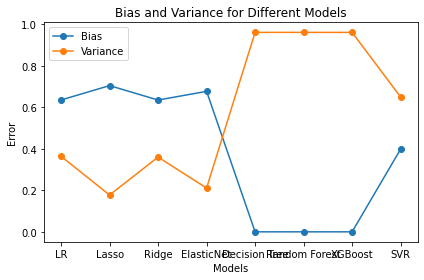

In [123]:
import matplotlib.pyplot as plt

# Calculate the bias and variance for each model
bias_values = [np.mean((y_pred - y_test) ** 2) for y_pred in [lr_pred, lasso_pred, ridge_pred, en_pred, dt_pred, rf_pred, xgb_pred, svr_pred]]
variance_values = [np.var(y_pred) for y_pred in [lr_pred, lasso_pred, ridge_pred, en_pred, dt_pred, rf_pred, xgb_pred, svr_pred]]

# Create a line plot
models = ['LR', 'Lasso', 'Ridge', 'ElasticNet', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR']
x = np.arange(len(models))

fig, ax = plt.subplots()
ax.plot(x, bias_values, marker='o', label='Bias')
ax.plot(x, variance_values, marker='o', label='Variance')

ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('Bias and Variance for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In [124]:
# Tunnning up for SVM 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Load the data
data = df_new

# Split the data into features and target variable
X = data.drop(['cons', 'tax', 'D1july09reg', 'D3oct11tax'], axis=1)
y = data['cons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

# Instantiate the SVR model
svm_model = SVR()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Fit the SVM model with the best parameters to the training data
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Calculate the R-squared, mean squared error, and root mean squared error
r2 = best_estimator.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("SVM Results:")
print("Best Parameters:", best_params)
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


SVM Results:
Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
R-squared: 0.6550931830570352
Mean Squared Error: 0.3314935449580338
Root Mean Squared Error: 0.5757547611249375


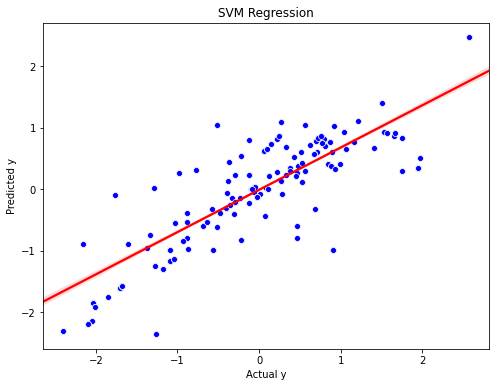

In [125]:
# Create a DataFrame to hold the actual y values, predicted values, and errors
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Errors': y_test - y_pred})

# Plot the actual y values against the predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("SVM Regression")

# Show the plot
plt.show()


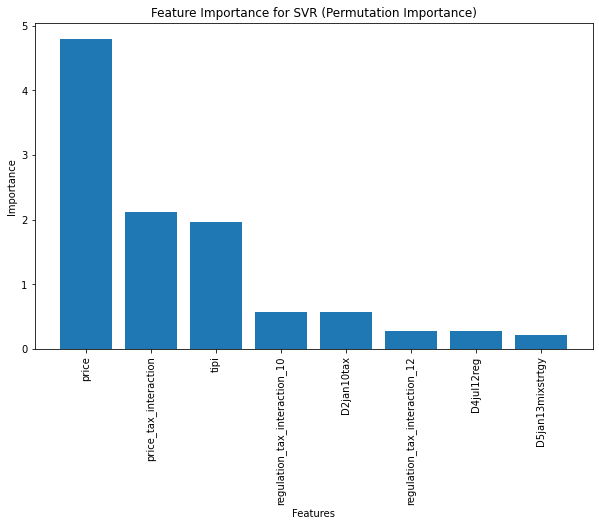

In [126]:
# Run this part later. It takes too much time because we use a different method for SVM feature importance to capture non-linearities so that it takes longer especially with larger data.

from sklearn.inspection import permutation_importance

# Fit the SVR model to the entire data
svr_model = SVR(kernel='rbf')
svr_model.fit(X, y)

# Calculate permutation importances
result = permutation_importance(svr_model, X, y, n_repeats=10, random_state=42)

# Get the feature importance from permutation importances
feature_importance = result.importances_mean

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]

# Get the corresponding feature names
feature_names = X.columns[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), sorted_feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for SVR (Permutation Importance)')
plt.show()
